<a href="https://colab.research.google.com/github/ErickAxelMartinezRios/Elevated-Blood-Pressure-Detection-based-on-PPG-data/blob/main/PPGBP_PPG_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Replace with your GitHub repo
!git config --global user.email "erick.martinezr95@gmail.com"
!git config --global user.name "ErickAxelMartinezRios"
# Clone your repo
!git clone https://github.com/ErickAxelMartinezRios/Elevated-Blood-Pressure-Detection-based-on-PPG-data.git

# Copy your notebook into the repo
!cp /content/your_notebook.ipynb Elevated-Blood-Pressure-Detection-based-on-PPG-data/

# Commit and push
%cd Elevated-Blood-Pressure-Detection-based-on-PPG-data
!git add your_notebook.ipynb
!git commit -m "Added updated notebook from Colab"
!git push

Cloning into 'Elevated-Blood-Pressure-Detection-based-on-PPG-data'...
cp: cannot stat 'PPGBP_PPG_DATA.ipynb': No such file or directory
[Errno 2] No such file or directory: 'yourrepo'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving PPG-BP dataset.csv to PPG-BP dataset.csv


In [ ]:
import seaborn as sns
import io
import numpy as np #Library to manage arrays
import pandas as pd #Lirary for mange dataframes
import matplotlib.pyplot as plt # Library to make plots.
#Import csv into a dataframe
df = pd.read_csv(io.BytesIO(uploaded['PPG-BP dataset.csv']))
print("Complete Data shape:", df.shape)
print("Data shape withput NA values",df.dropna().shape)

Complete Data shape: (219, 14)
Data shape withput NA values (0, 14)


In [ ]:
columns_na = df.isnull().sum(axis = 0)
pd.set_option('display.max_rows', None)
columns_na

Num.                                0
subject_ID                          0
Sex(M/F)                            0
Age(year)                           0
Height(cm)                          0
Weight(kg)                          0
Systolic Blood Pressure(mmHg)       0
Diastolic Blood Pressure(mmHg)      0
Heart Rate(b/m)                     0
BMI(kg/m^2)                         0
Hypertension                        0
Diabetes                          181
cerebral infarction               199
cerebrovascular disease           194
dtype: int64

In [ ]:
df.describe()

Num.  subject_ID   Age(year)  Height(cm)  Weight(kg)  \
count  219.000000  219.000000  219.000000  219.000000  219.000000   
mean   110.000000  156.598174   57.168950  161.228311   60.191781   
std     63.364028  101.604347   15.874327    8.202871   11.886301   
min      1.000000    2.000000   21.000000  145.000000   36.000000   
25%     55.500000   85.500000   48.000000  155.000000   52.500000   
50%    110.000000  152.000000   58.000000  160.000000   60.000000   
75%    164.500000  214.500000   67.500000  167.000000   66.500000   
max    219.000000  419.000000   86.000000  196.000000  103.000000   

       Systolic Blood Pressure(mmHg)  Diastolic Blood Pressure(mmHg)  \
count                     219.000000                      219.000000   
mean                      127.945205                       71.849315   
std                        20.377779                       11.111203   
min                        80.000000                       42.000000   
25%                       113.500000                       64.000000   
50%                       126.000000                       70.000000   
75%                       139.000000                       78.000000   
max                       182.000000                      107.000000   

       Heart Rate(b/m)  BMI(kg/m^2)  
count       219.000000   219.000000  
mean         73.639269    23.107215  
std          10.738874     4.004302  
min          52.000000    14.690000  
25%          66.000000    20.550000  
50%          73.000000    22.600000  
75%          80.000000    25.000000  
max         106.000000    37.460000

Text(0, 0.5, 'Counts')

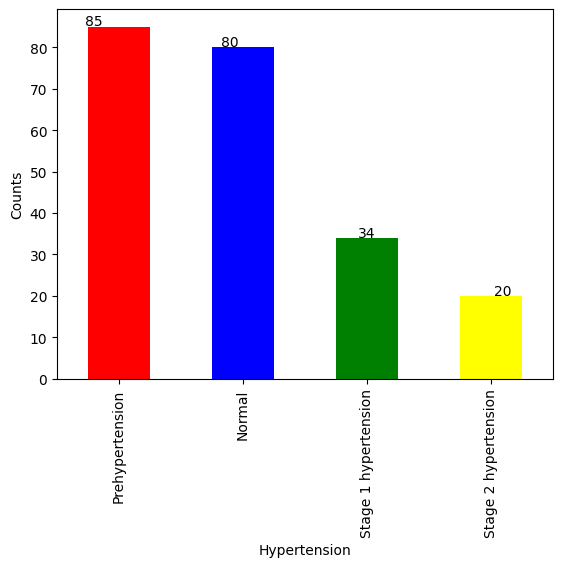

In [ ]:
classes = df['Hypertension'].value_counts()
ax = classes.plot.bar(rot = 90, color=["red", "blue", "green","yellow"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.1, p.get_height() * 1.005))
ax.set_ylabel("Counts")

Drop columns that re not relevant such ass

In [ ]:
df_ch3 =  df.drop(['Num.', 'subject_ID', 'cerebral infarction', 'Diabetes', 'cerebrovascular disease'], axis =1)

In [ ]:
df_ch3.head()

Sex(M/F)  Age(year)  Height(cm)  Weight(kg)  Systolic Blood Pressure(mmHg)  \
0   Female         24         155          38                             96   
1     Male         58         168          45                            116   
2   Female         58         160          42                            111   
3   Female         30         161          44                            105   
4     Male         67         159          43                            116   

   Diastolic Blood Pressure(mmHg)  Heart Rate(b/m)  BMI(kg/m^2) Hypertension  
0                              67               82        15.82       Normal  
1                              60               78        15.94       Normal  
2                              65               67        16.41       Normal  
3                              70               85        16.97       Normal  
4                              61               80        17.01       Normal

Correlation map

In [ ]:
df_ch4 = df.drop(['Num.', 'subject_ID', 'cerebral infarction', 'Diabetes', 'cerebrovascular disease','Hypertension', "Sex(M/F)"], axis =1)

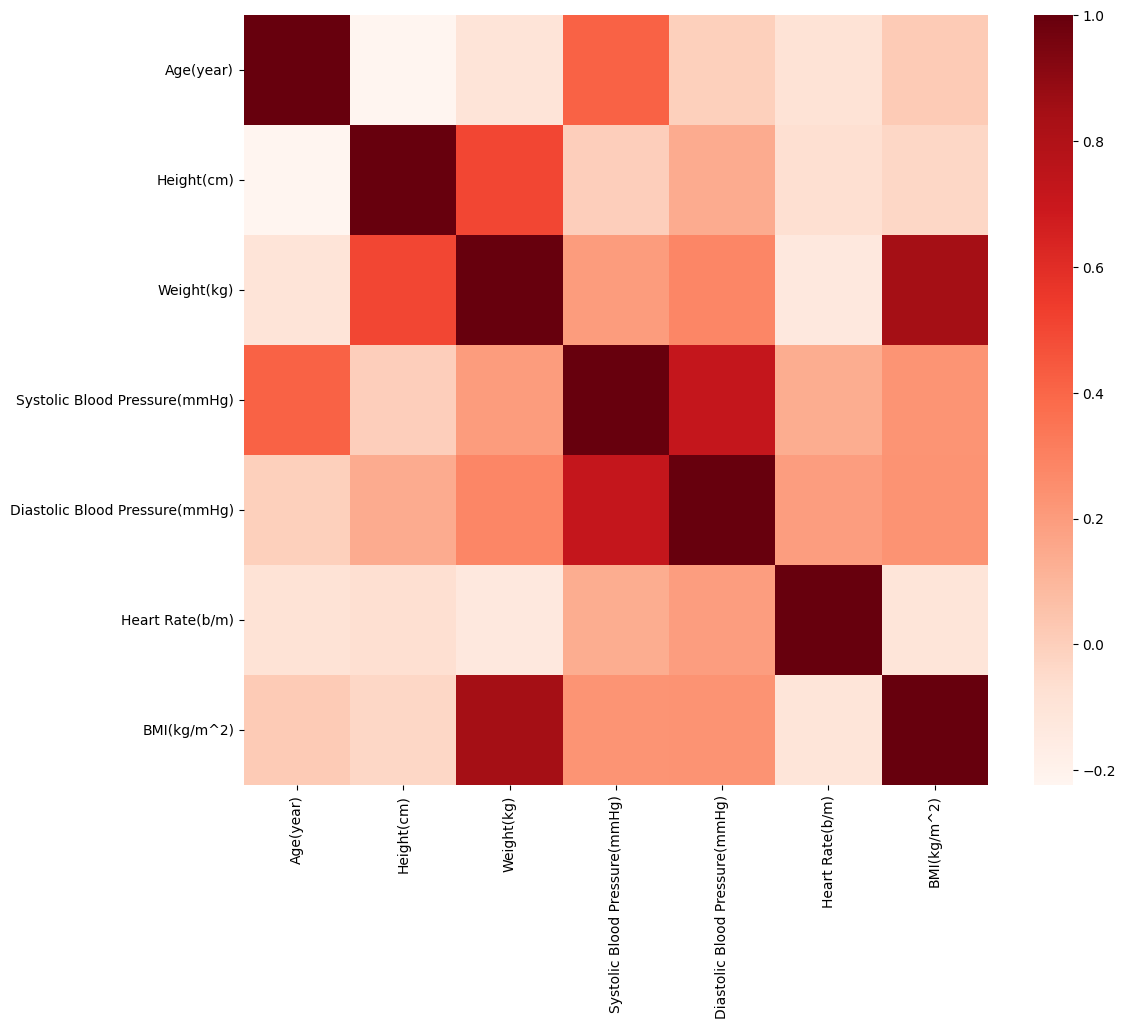

In [ ]:
plt.figure(figsize=(12,10))
df_corr = df_ch4.corr()
sns.heatmap(df_corr, annot=False, cmap=plt.cm.Reds)
plt.show()

/tmp/ipython-input-1567023218.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ch4[feature] , color=c[i], ax=ax,axlabel=feature)
/tmp/ipython-input-1567023218.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ch4[feature] , color=c[i], ax=ax,axlabel=feature)
/tmp/ipython-input-1567023

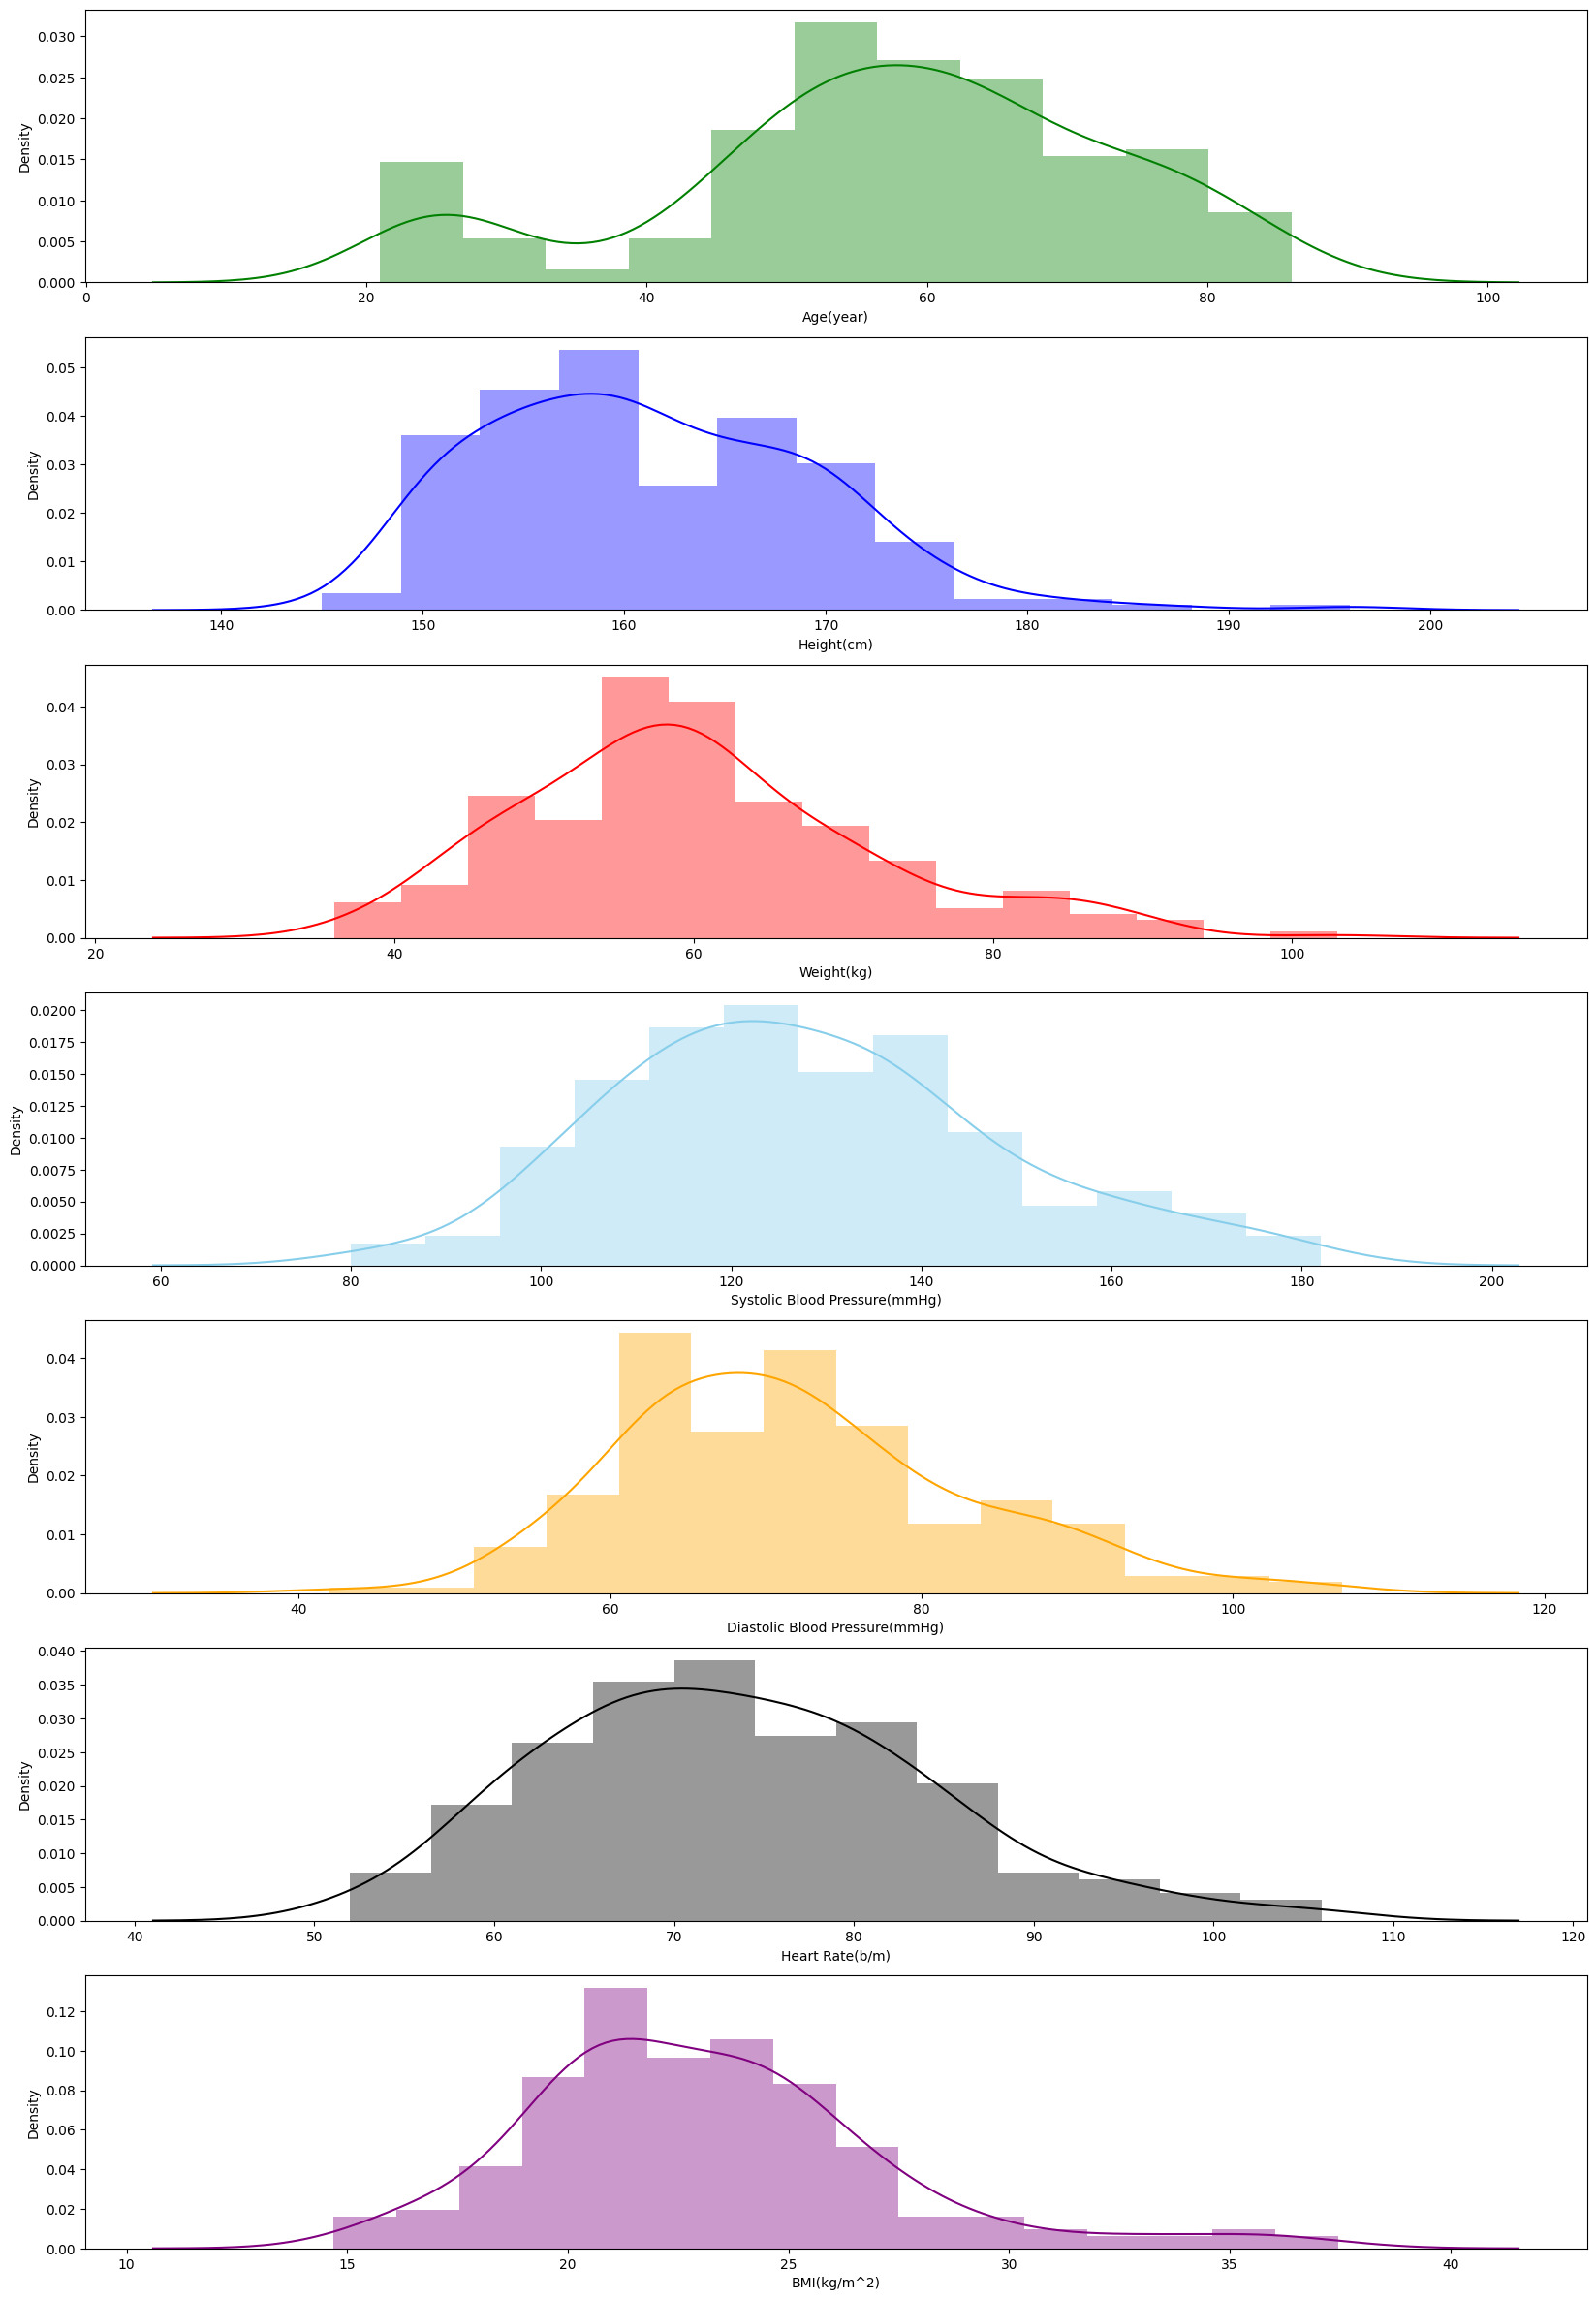

In [ ]:
import seaborn as sns
c = ["green", "blue", "red", "skyblue", "orange", "black","purple"]
f, axes = plt.subplots(7, 1, figsize=(20, 30), sharex=False)
i=0
for ax, feature in zip(axes.flat, df_ch4.columns):
    sns.distplot(df_ch4[feature] , color=c[i], ax=ax,axlabel=feature)
    i = i + 1
del i

<Axes: xlabel='variable', ylabel='value'>

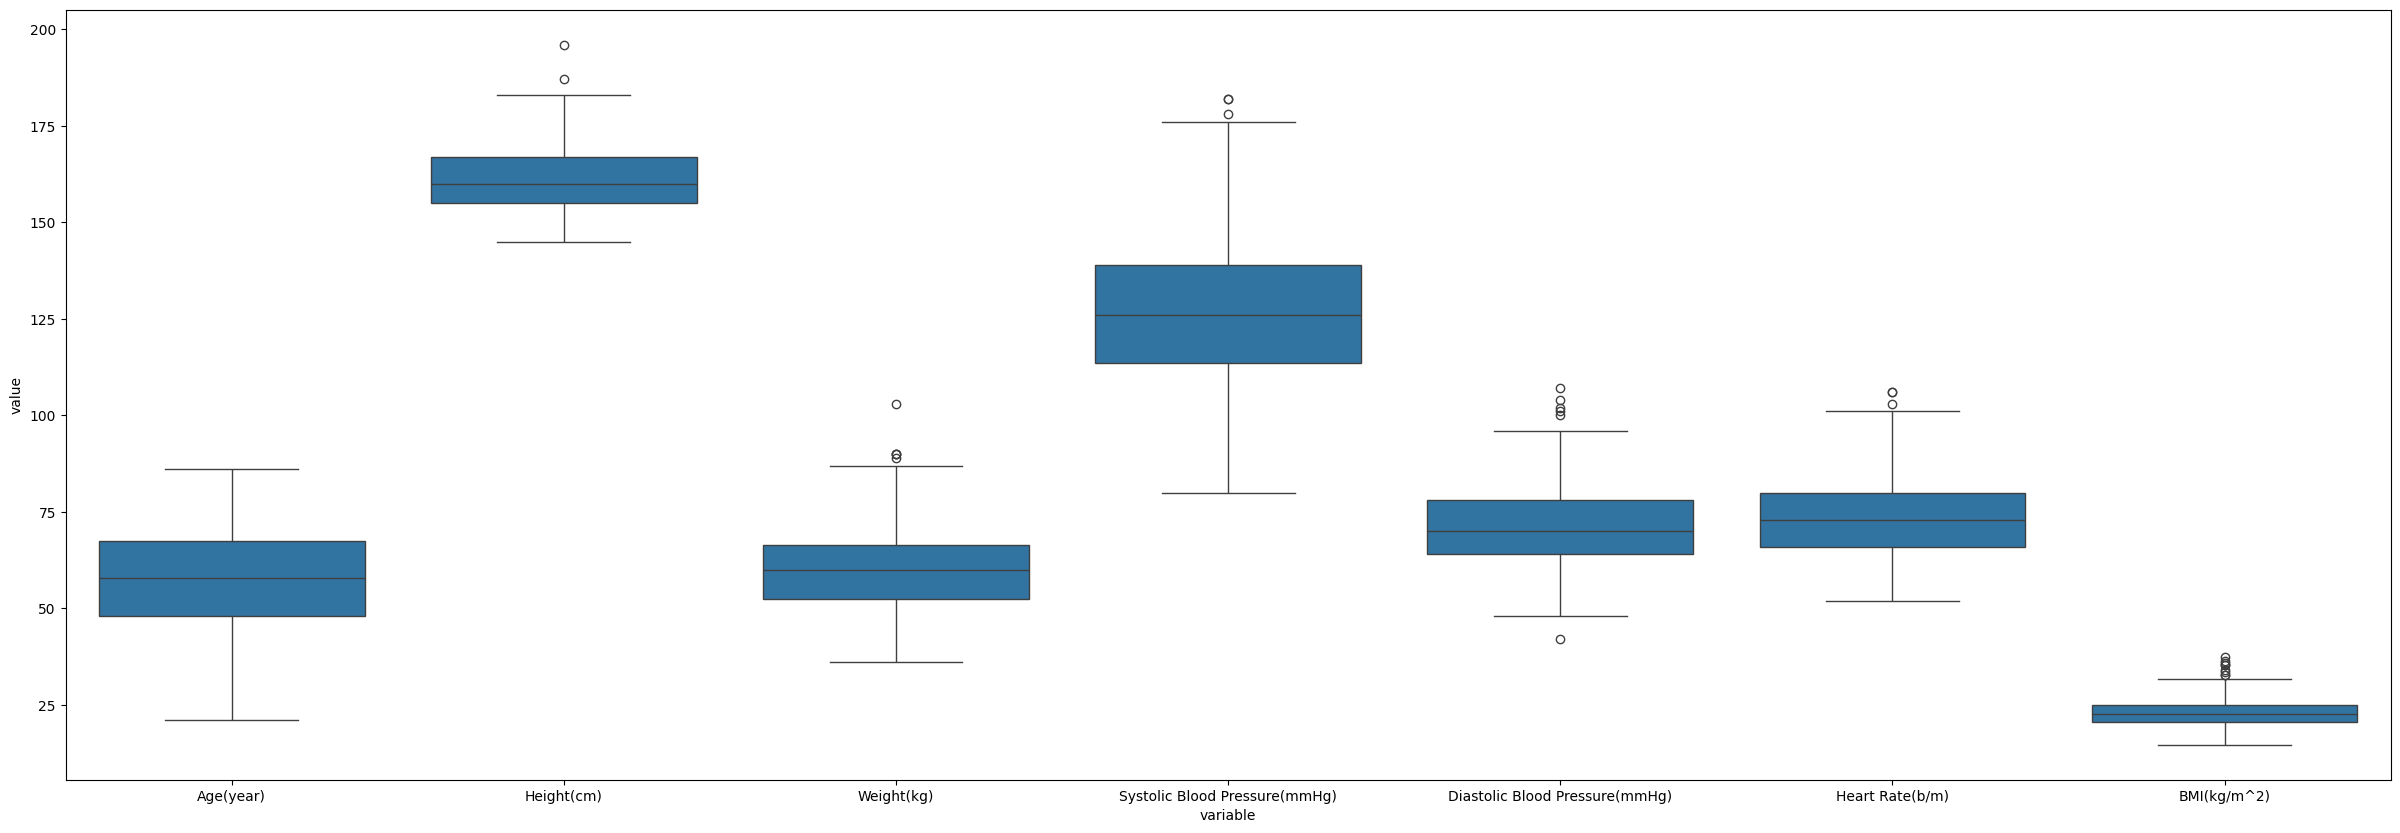

In [ ]:
plt.rcParams['figure.figsize']=(30,10)
sns.boxplot(x="variable", y="value", data=pd.melt(df_ch4))

Save descriptive statistics into csv file

In [ ]:
df_ch3.describe().to_csv("my_description.csv")

Train decision tree and estimate the relative feature importance

In [ ]:
df_n = df.drop(['Num.', 'subject_ID', 'cerebral infarction', 'Diabetes', 'cerebrovascular disease','Systolic Blood Pressure(mmHg)','Diastolic Blood Pressure(mmHg)'], axis=1)

In [ ]:
df_n.head()

Sex(M/F)  Age(year)  Height(cm)  Weight(kg)  Heart Rate(b/m)  BMI(kg/m^2)  \
0   Female         24         155          38               82        15.82   
1     Male         58         168          45               78        15.94   
2   Female         58         160          42               67        16.41   
3   Female         30         161          44               85        16.97   
4     Male         67         159          43               80        17.01   

  Hypertension  
0       Normal  
1       Normal  
2       Normal  
3       Normal  
4       Normal

In [ ]:
df_n['Sex(M/F)'] = df_n["Sex(M/F)"].astype('category').cat.codes
df_filtered =  df_n
# Select input variables and separate target variable
features = df_filtered.loc[:,  df_n.columns != 'Hypertension']
print(features.shape)

(219, 6)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = df[['subject_ID']]
from scipy.stats import skew

optimal

Import SQI_indez.csv file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SQI_index.csv to SQI_index.csv


In [ ]:
import pandas as pd
import numpy as np
df_sqi = pd.read_csv(io.BytesIO(uploaded['SQI_index.csv']))

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
final_sqi = []
for i in range(0,219):
  for j in range(0,219):
    if df1.values[i,0] == df_sqi.values[j,0]:
      #print(df1.values[i,0],df_sqi.values[j,1])
      final_sqi.append(str(df1.values[i,0])+"_"+str(df_sqi.values[j,1]))
print(final_sqi)

Mounted at /content/drive
['407_1', '124_2', '222_1', '66_3', '131_1', '405_3', '409_2', '403_3', '167_2', '126_3', '65_2', '164_1', '419_1', '53_2', '416_3', '119_2', '229_2', '414_3', '404_1', '179_1', '58_1', '13_3', '116_3', '161_1', '176_1', '23_3', '173_3', '40_2', '149_2', '411_1', '107_1', '41_1', '412_3', '6_3', '14_1', '410_1', '127_2', '418_3', '185_3', '67_3', '24_3', '145_1', '247_1', '415_2', '190_1', '84_1', '165_1', '32_3', '52_1', '211_1', '63_1', '56_3', '182_2', '200_3', '60_2', '413_1', '235_2', '256_3', '17_3', '62_2', '98_2', '158_2', '27_1', '89_2', '61_3', '224_2', '248_3', '91_1', '230_3', '406_3', '148_3', '246_2', '163_1', '172_2', '12_2', '19_1', '18_3', '191_1', '152_3', '115_3', '134_3', '196_1', '57_1', '417_3', '137_3', '215_3', '259_3', '103_3', '226_2', '123_3', '156_2', '153_2', '22_1', '209_1', '64_2', '214_2', '114_3', '160_2', '47_1', '166_2', '237_3', '244_2', '29_1', '99_1', '245_3', '254_2', '11_1', '34_1', '110_1', '180_3', '113_3', '122_1', '1

In [ ]:
data_ppg = np.zeros((219,2100))
data_ppg.shape

(219, 2100)

In [ ]:
from scipy import stats

In [ ]:
for i in range(219):
  with open('/content/drive/MyDrive/PPG-BP/Data File/0_subject/' + str(final_sqi[i]) +'.txt' , 'r') as f:
    lines = f.readlines()
    x = [line.split() for line in lines]
    ppg = [float(k) for k in x[:][0]]
    data_ppg[i,:] = ppg[0:2100]

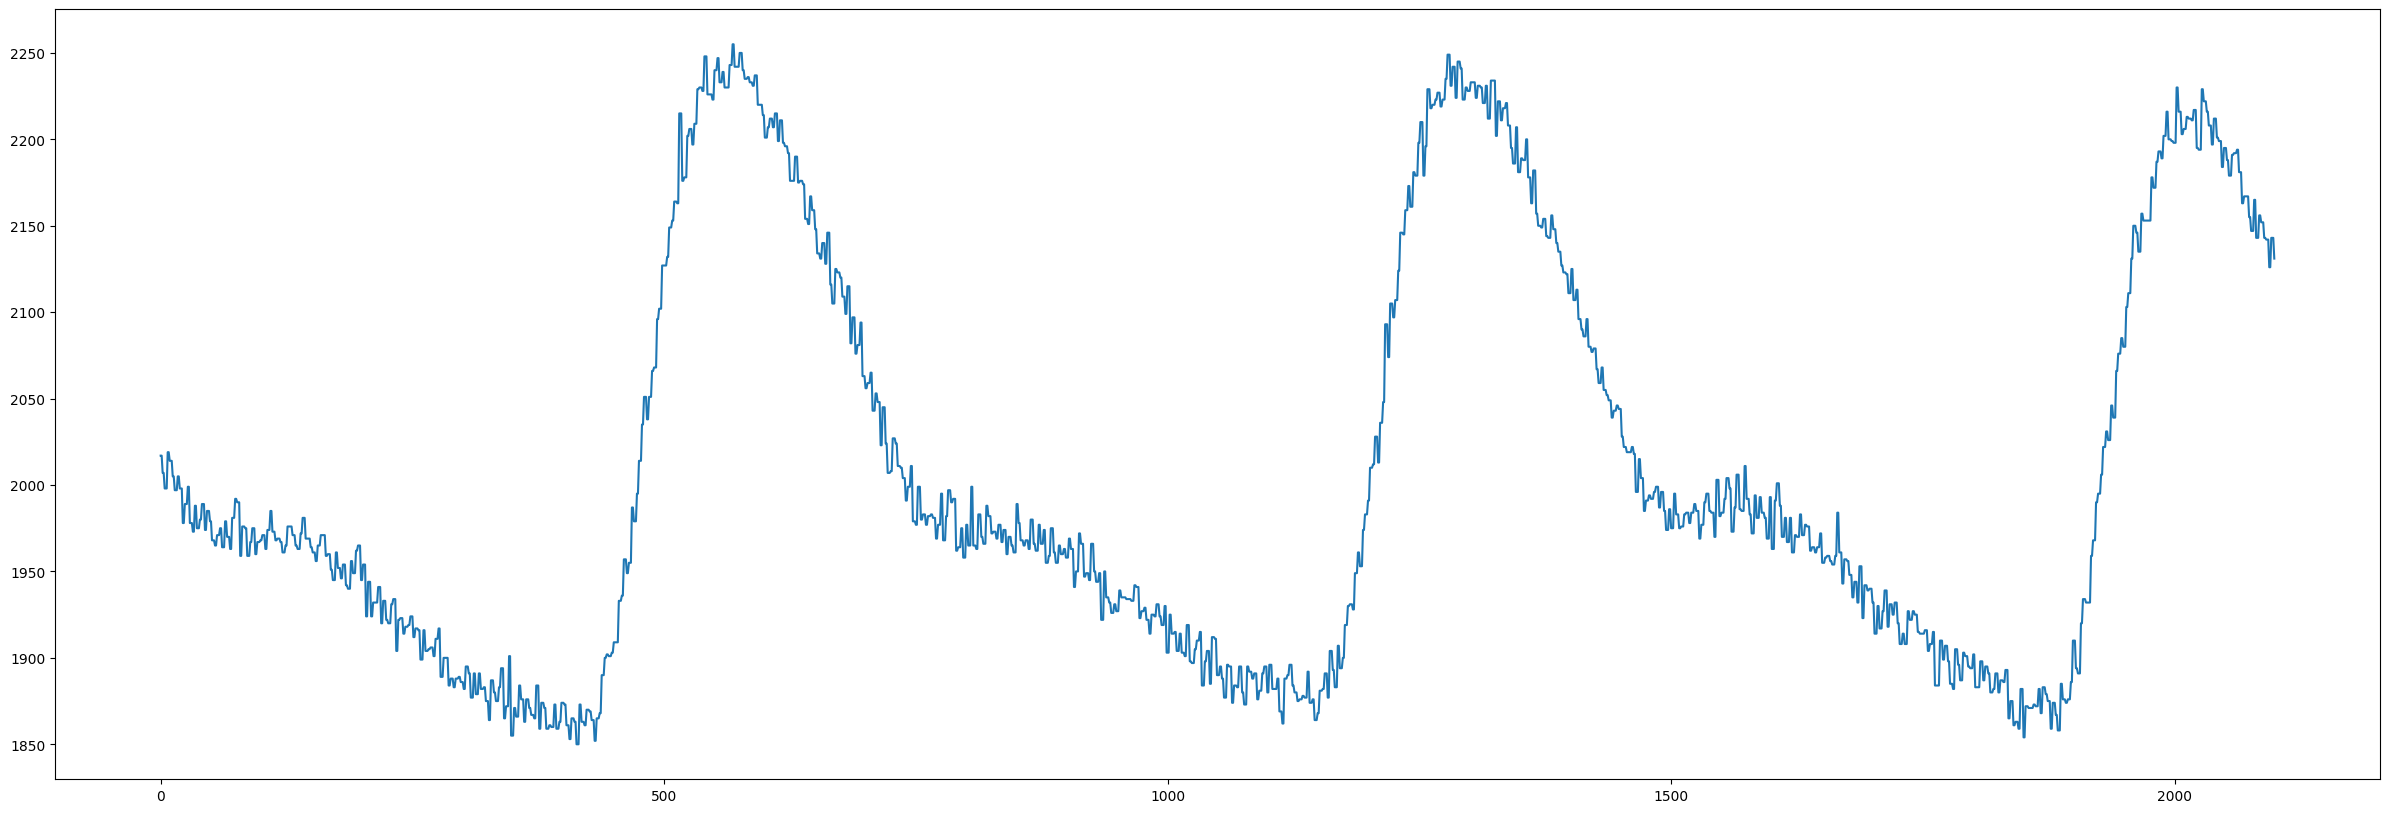

In [ ]:
plt.plot(data_ppg[70])

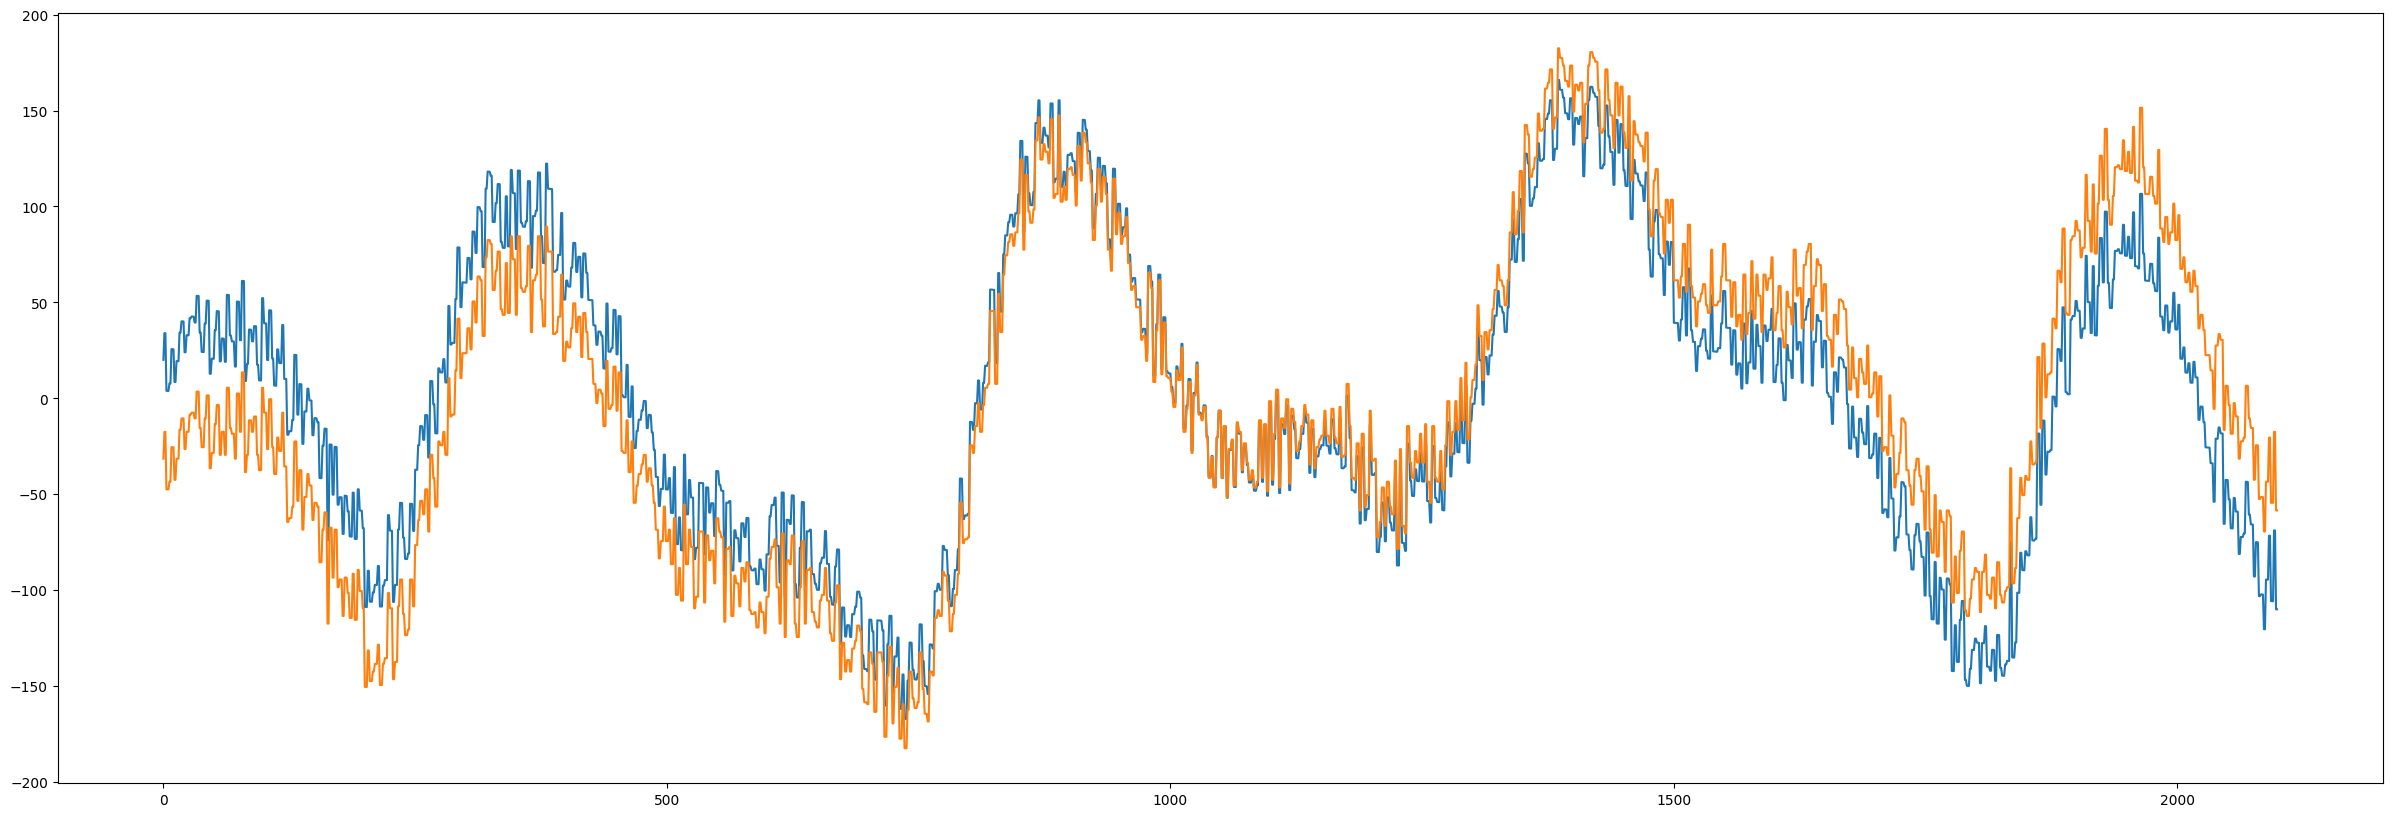

In [ ]:
from scipy import signal
plt.plot(signal.detrend(data_ppg[51], type= 'linear'))
plt.plot(data_ppg[51]- np.mean(data_ppg[51]))

[Text(0.5, 0, 'Samples')]

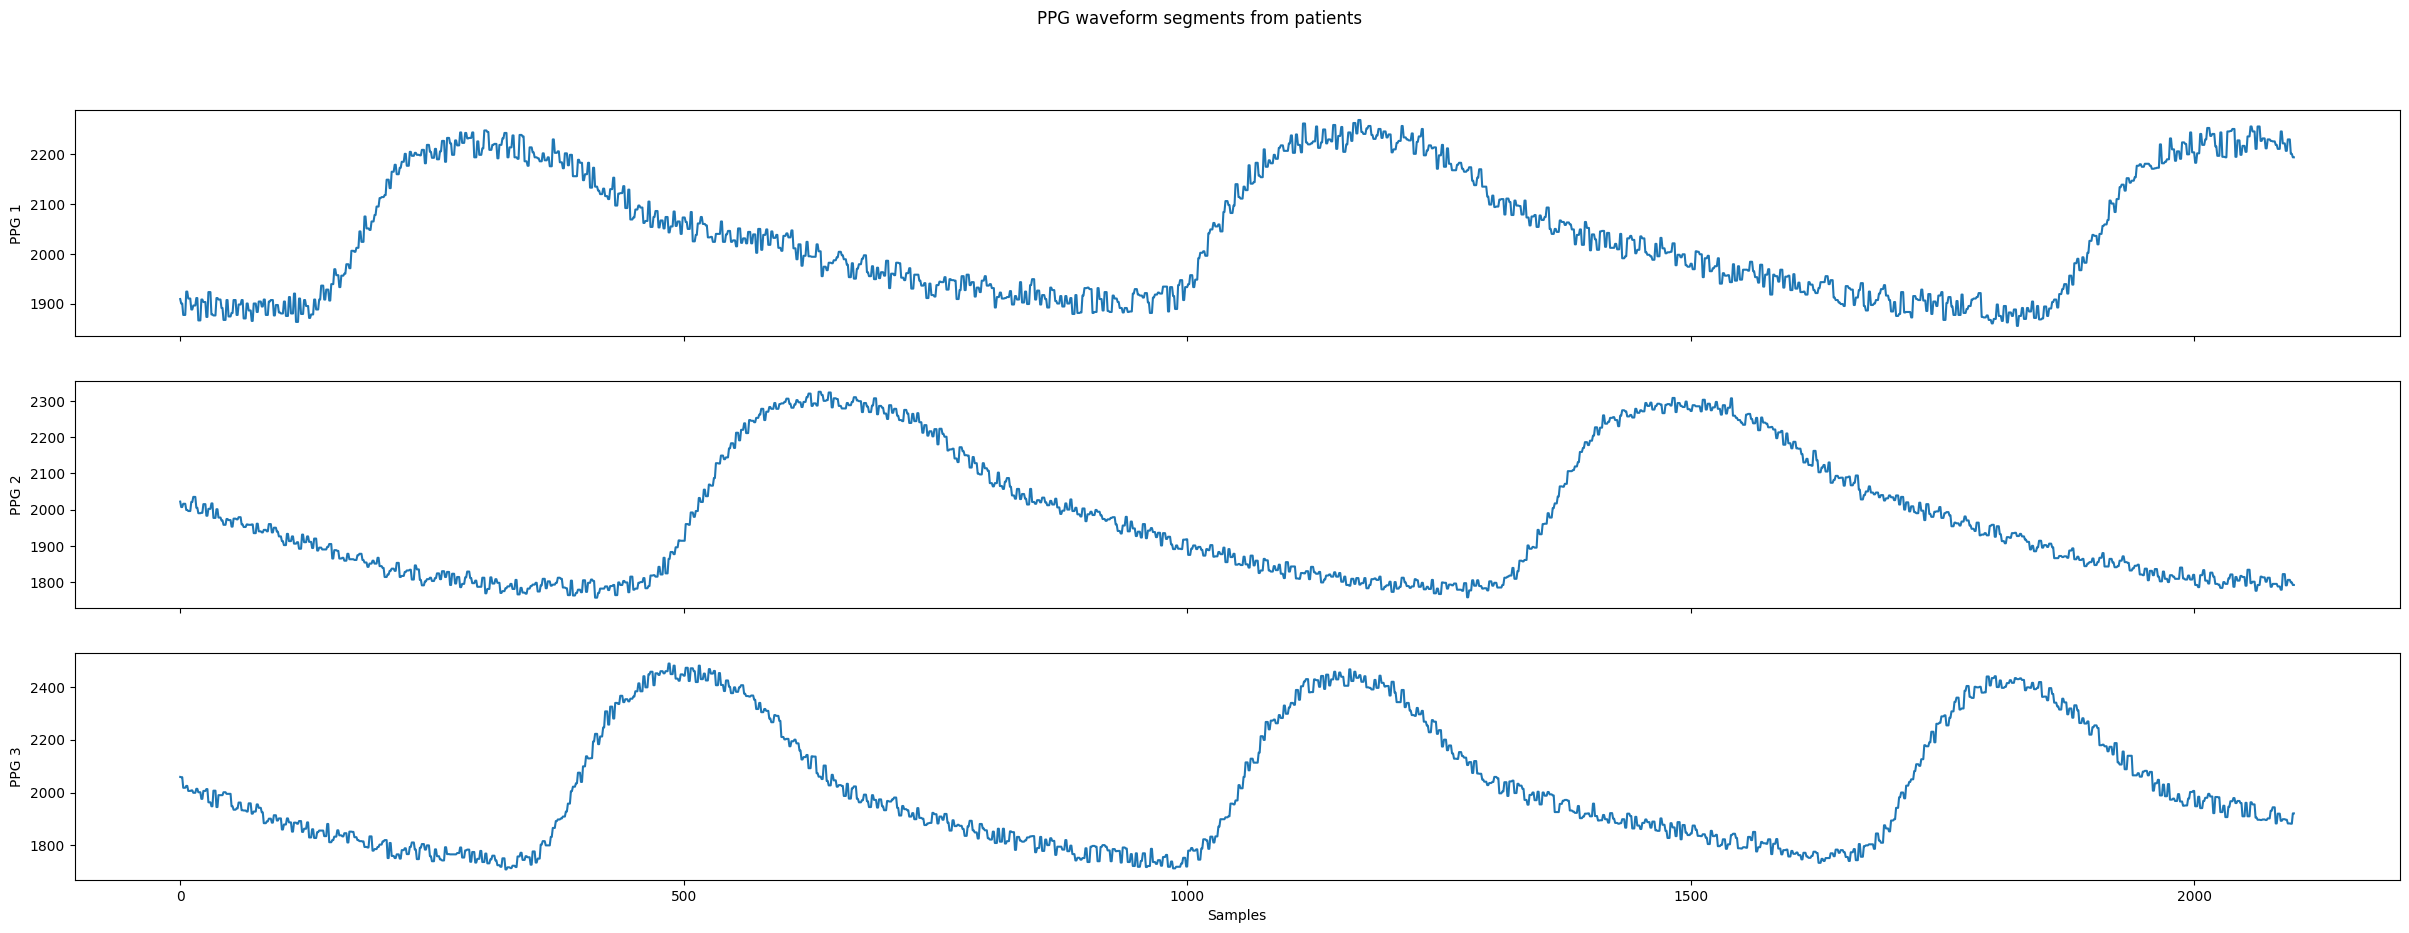

In [ ]:
fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('PPG waveform segments from patients')
axs[0].plot(data_ppg[15])
axs[1].plot(data_ppg[90])
axs[2].plot(data_ppg[218])
labels = ['PPG 1', 'PPG 2', 'PPG 3']
i=0
for ax in axs.flat:
  ax.set(ylabel=labels[i])
  i = i+1
ax.set(xlabel='Samples')

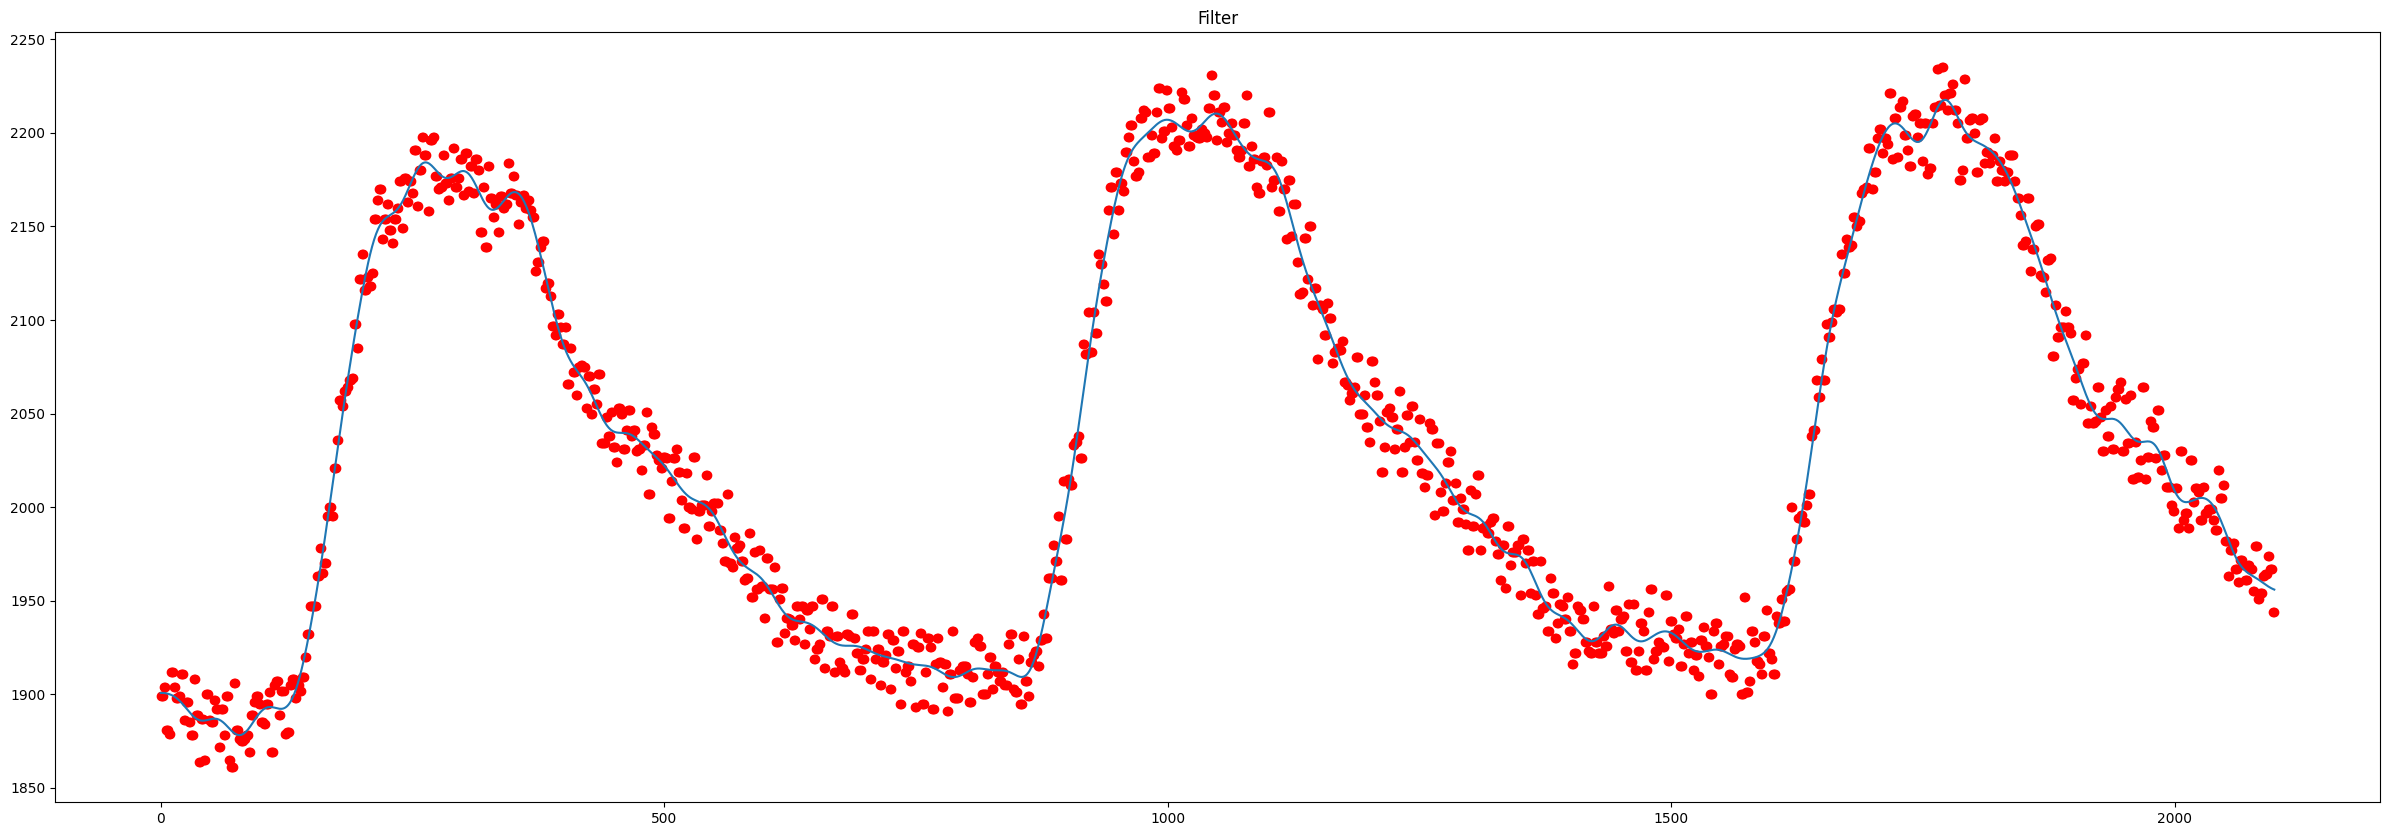

In [ ]:
from scipy import signal
sig = data_ppg[85]
plt.plot(sig, 'ro')
plt.title('Filter')
sos = signal.butter(6, 25, 'lowpass', fs=1000, output='sos')
filtered = signal.sosfiltfilt(sos, sig)
plt.plot(filtered)
plt.show()

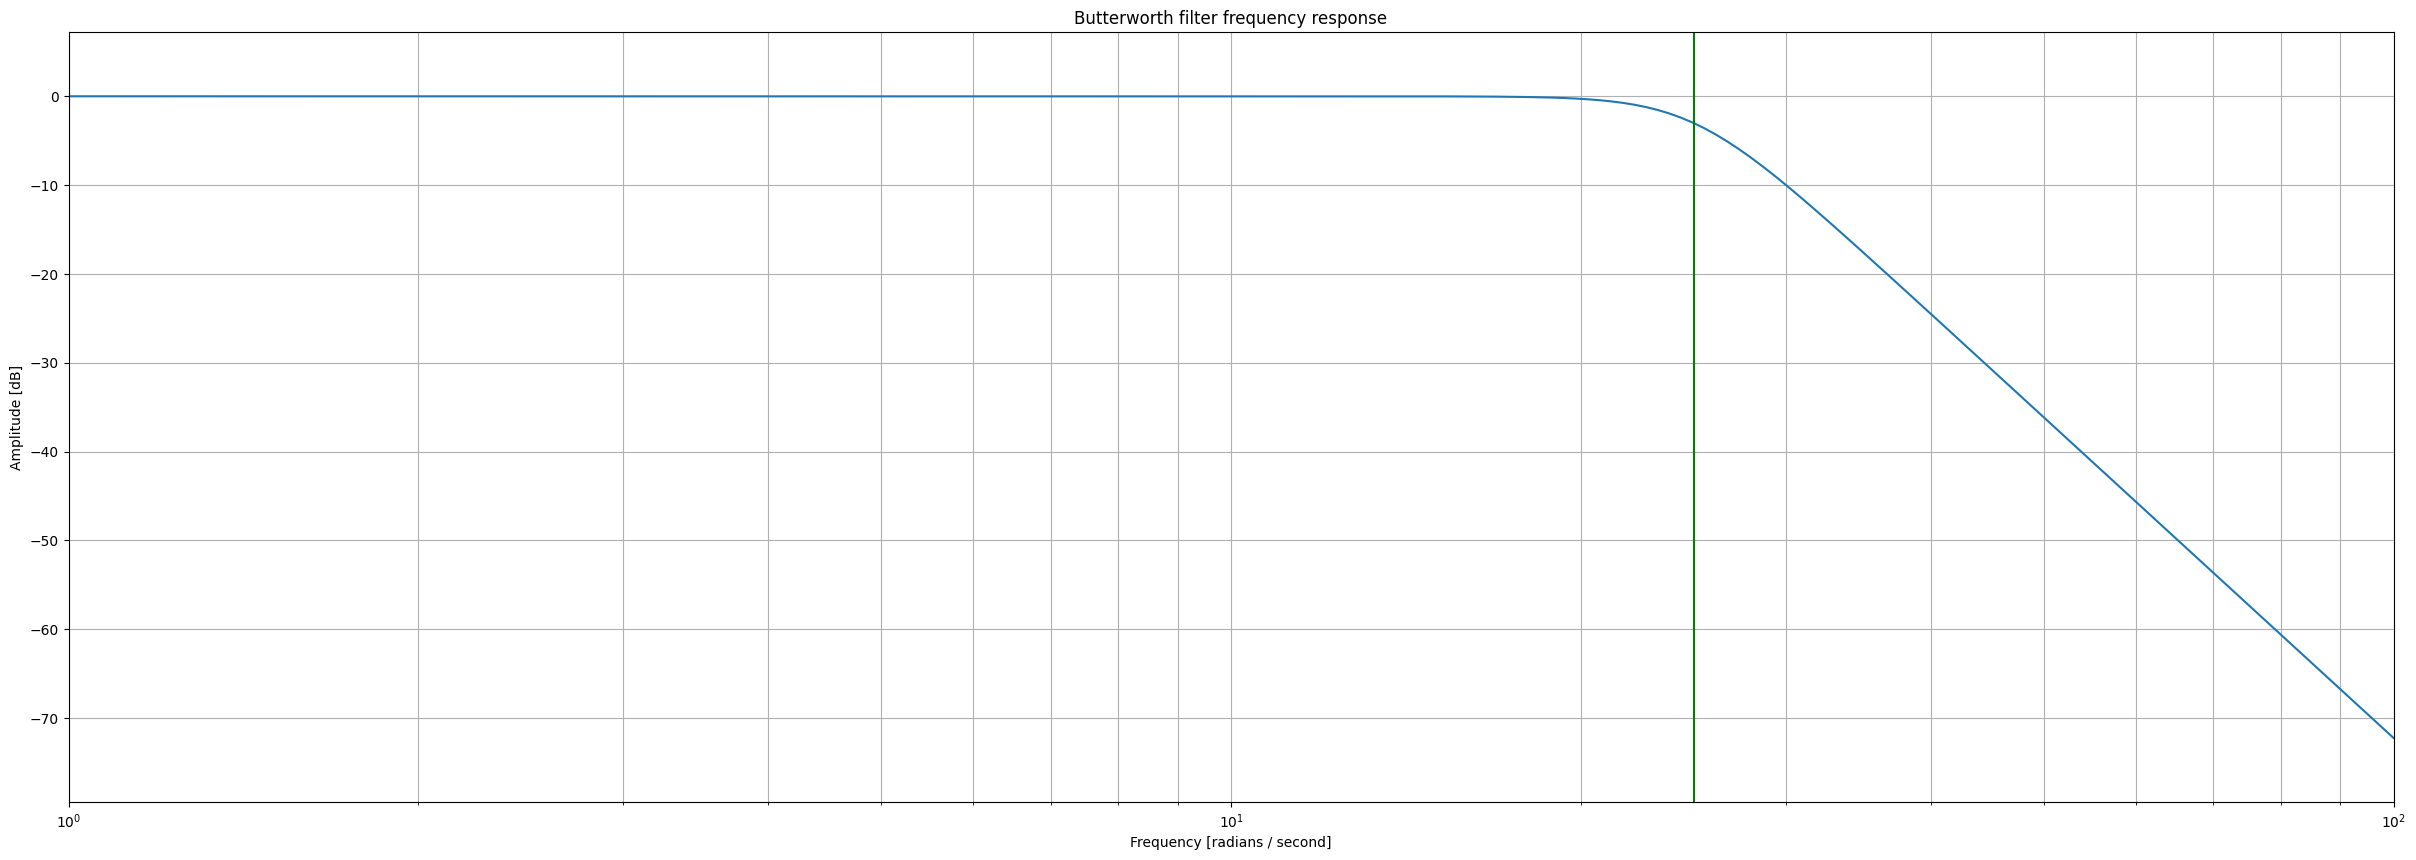

In [ ]:
b, a = signal.butter(6, 25, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(25, color='green') # cutoff frequency
plt.show()

In [ ]:
data_ppg_filtered = np.zeros((219,2100))
data_ppg_filtered.shape

(219, 2100)

In [ ]:
for ii in range(0,len(data_ppg)):
  sig_raw = data_ppg[ii]
  sig_trend = signal.detrend(sig_raw, type= 'linear')
  filtered_temp = signal.sosfiltfilt(sos, sig_raw)
  data_ppg_filtered[ii,:] = filtered_temp

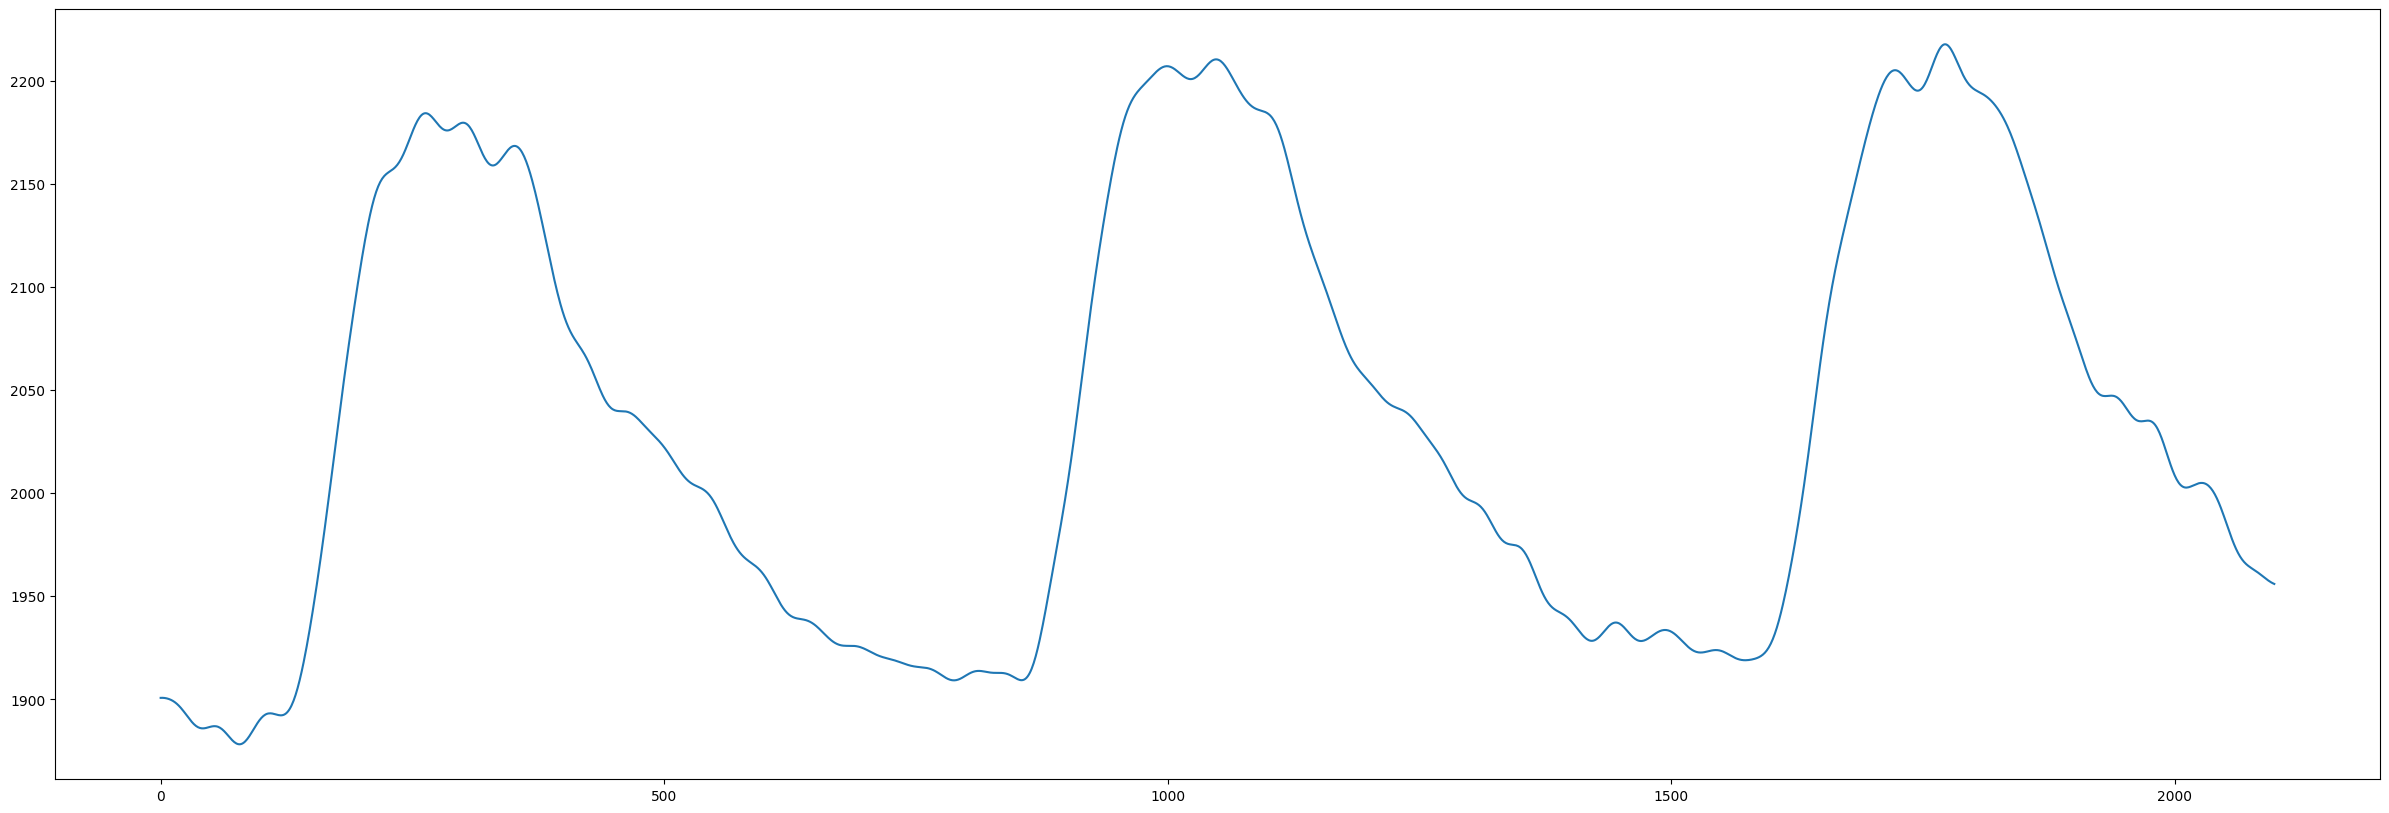

In [ ]:
plt.plot(data_ppg_filtered[85])

[Text(0.5, 0, 'Samples')]

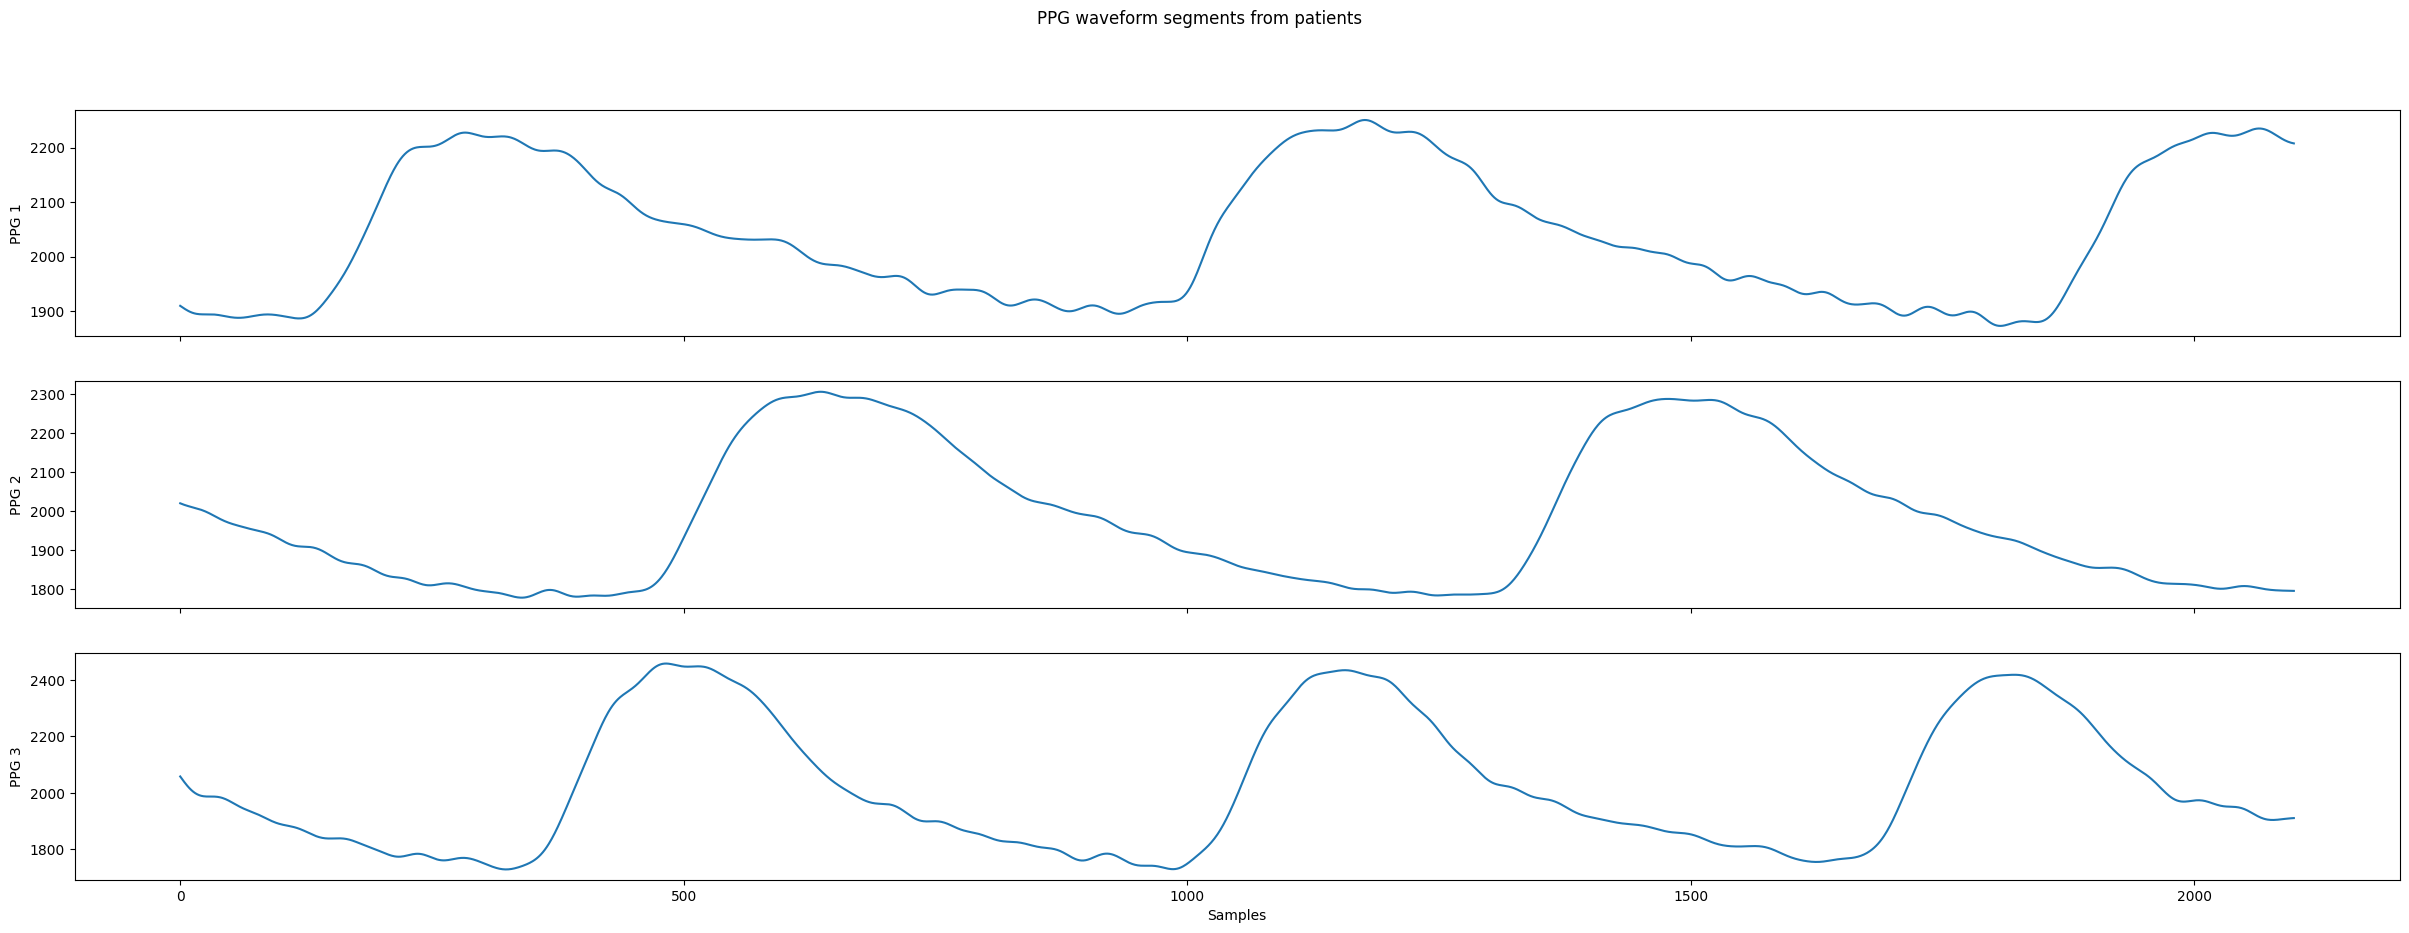

In [ ]:
fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('PPG waveform segments from patients')
axs[0].plot(data_ppg_filtered[15])
axs[1].plot(data_ppg_filtered[90])
axs[2].plot(data_ppg_filtered[218])
labels = ['PPG 1', 'PPG 2', 'PPG 3']
i=0
for ax in axs.flat:
  ax.set(ylabel=labels[i])
  i = i+1
ax.set(xlabel='Samples')

In [ ]:
data_ppg_norm = np.zeros((219,2100))
data_ppg_norm.shape

(219, 2100)

In [ ]:
for jj in range(0,len(data_ppg_filtered)):
  sig_ = data_ppg_filtered[jj]
  ppg_norm = stats.zscore(sig_)
  data_ppg_norm[jj,:] = ppg_norm

[Text(0.5, 0, 'Samples')]

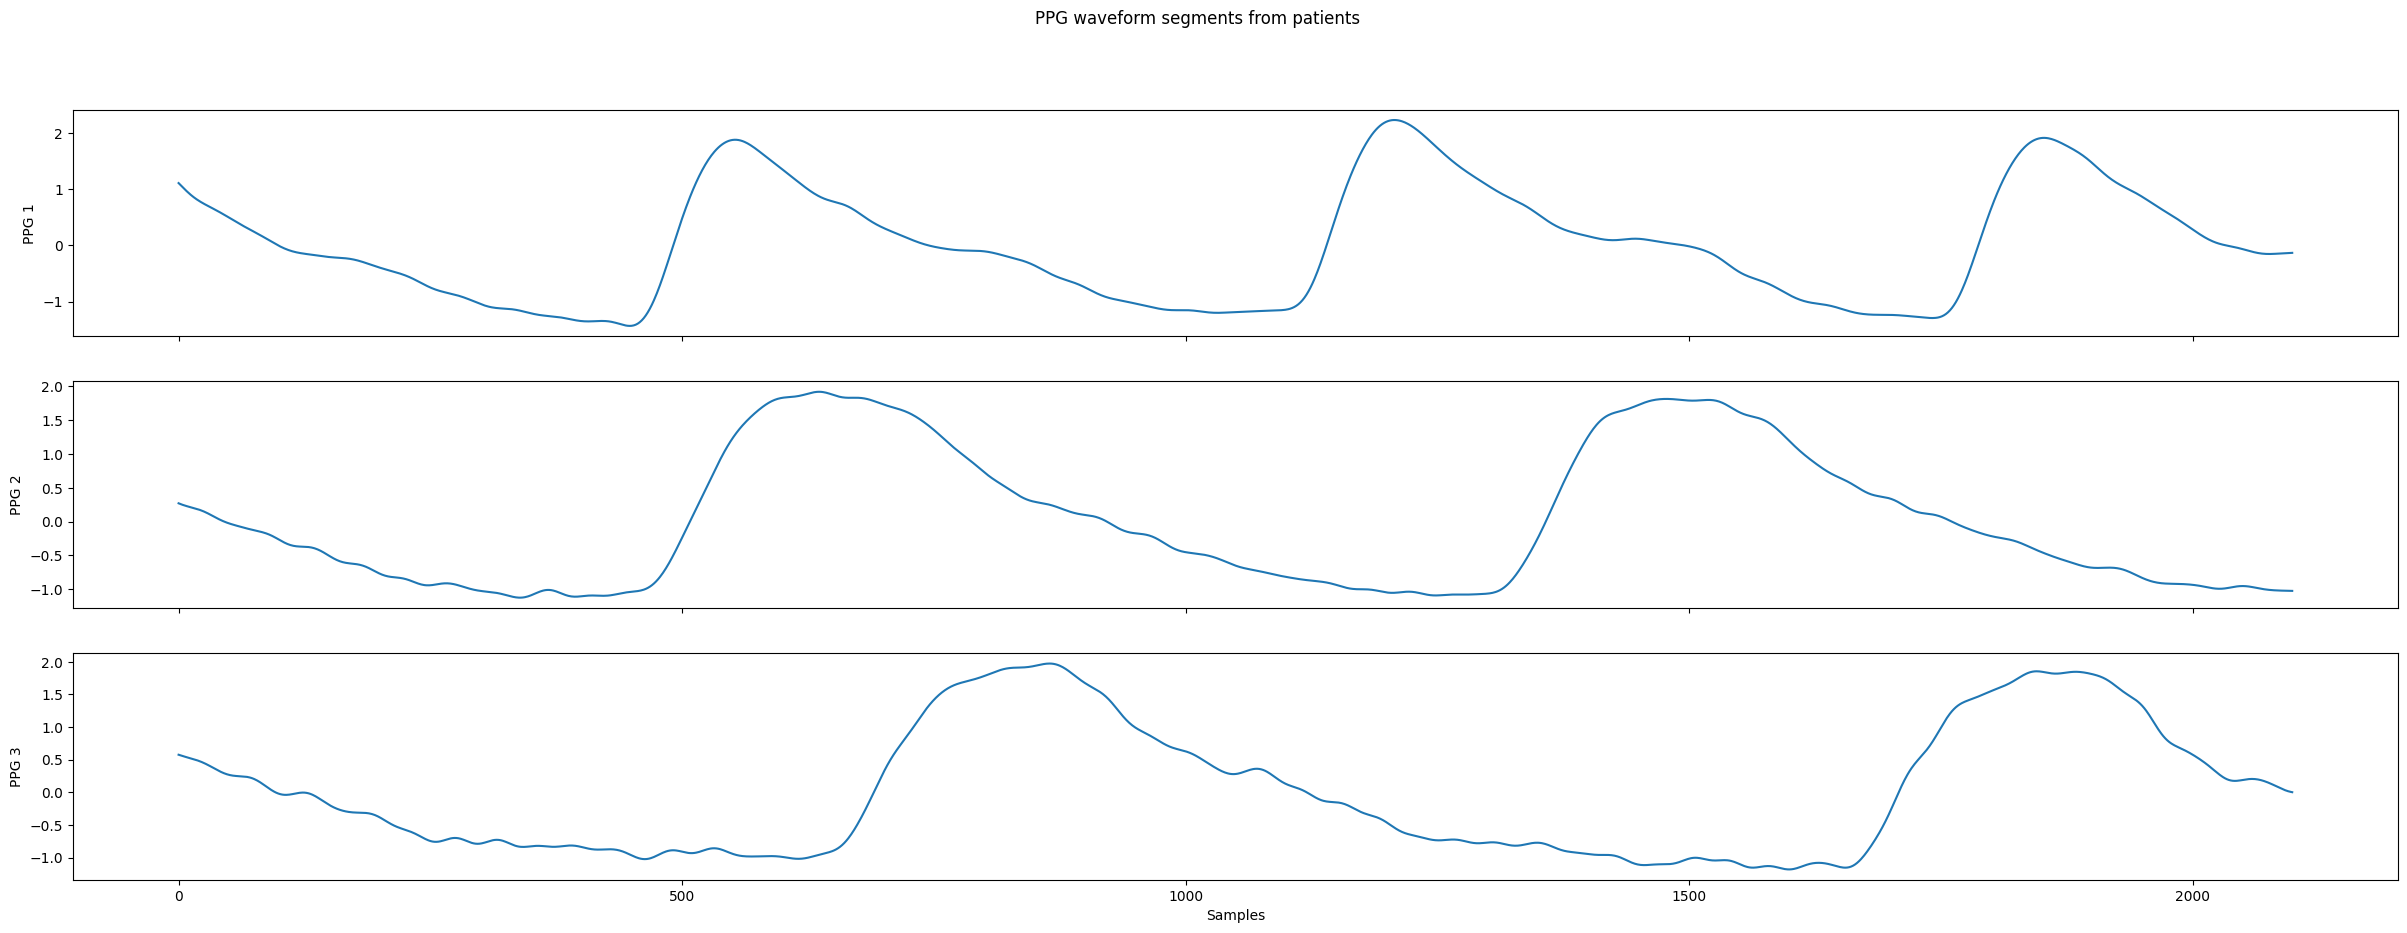

In [ ]:
fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('PPG waveform segments from patients')
axs[0].plot(data_ppg_norm[5])
axs[1].plot(data_ppg_norm[90])
axs[2].plot(data_ppg_norm[200])
labels = ['PPG 1', 'PPG 2', 'PPG 3']
i=0
for ax in axs.flat:
  ax.set(ylabel=labels[i])
  i = i+1
ax.set(xlabel='Samples')

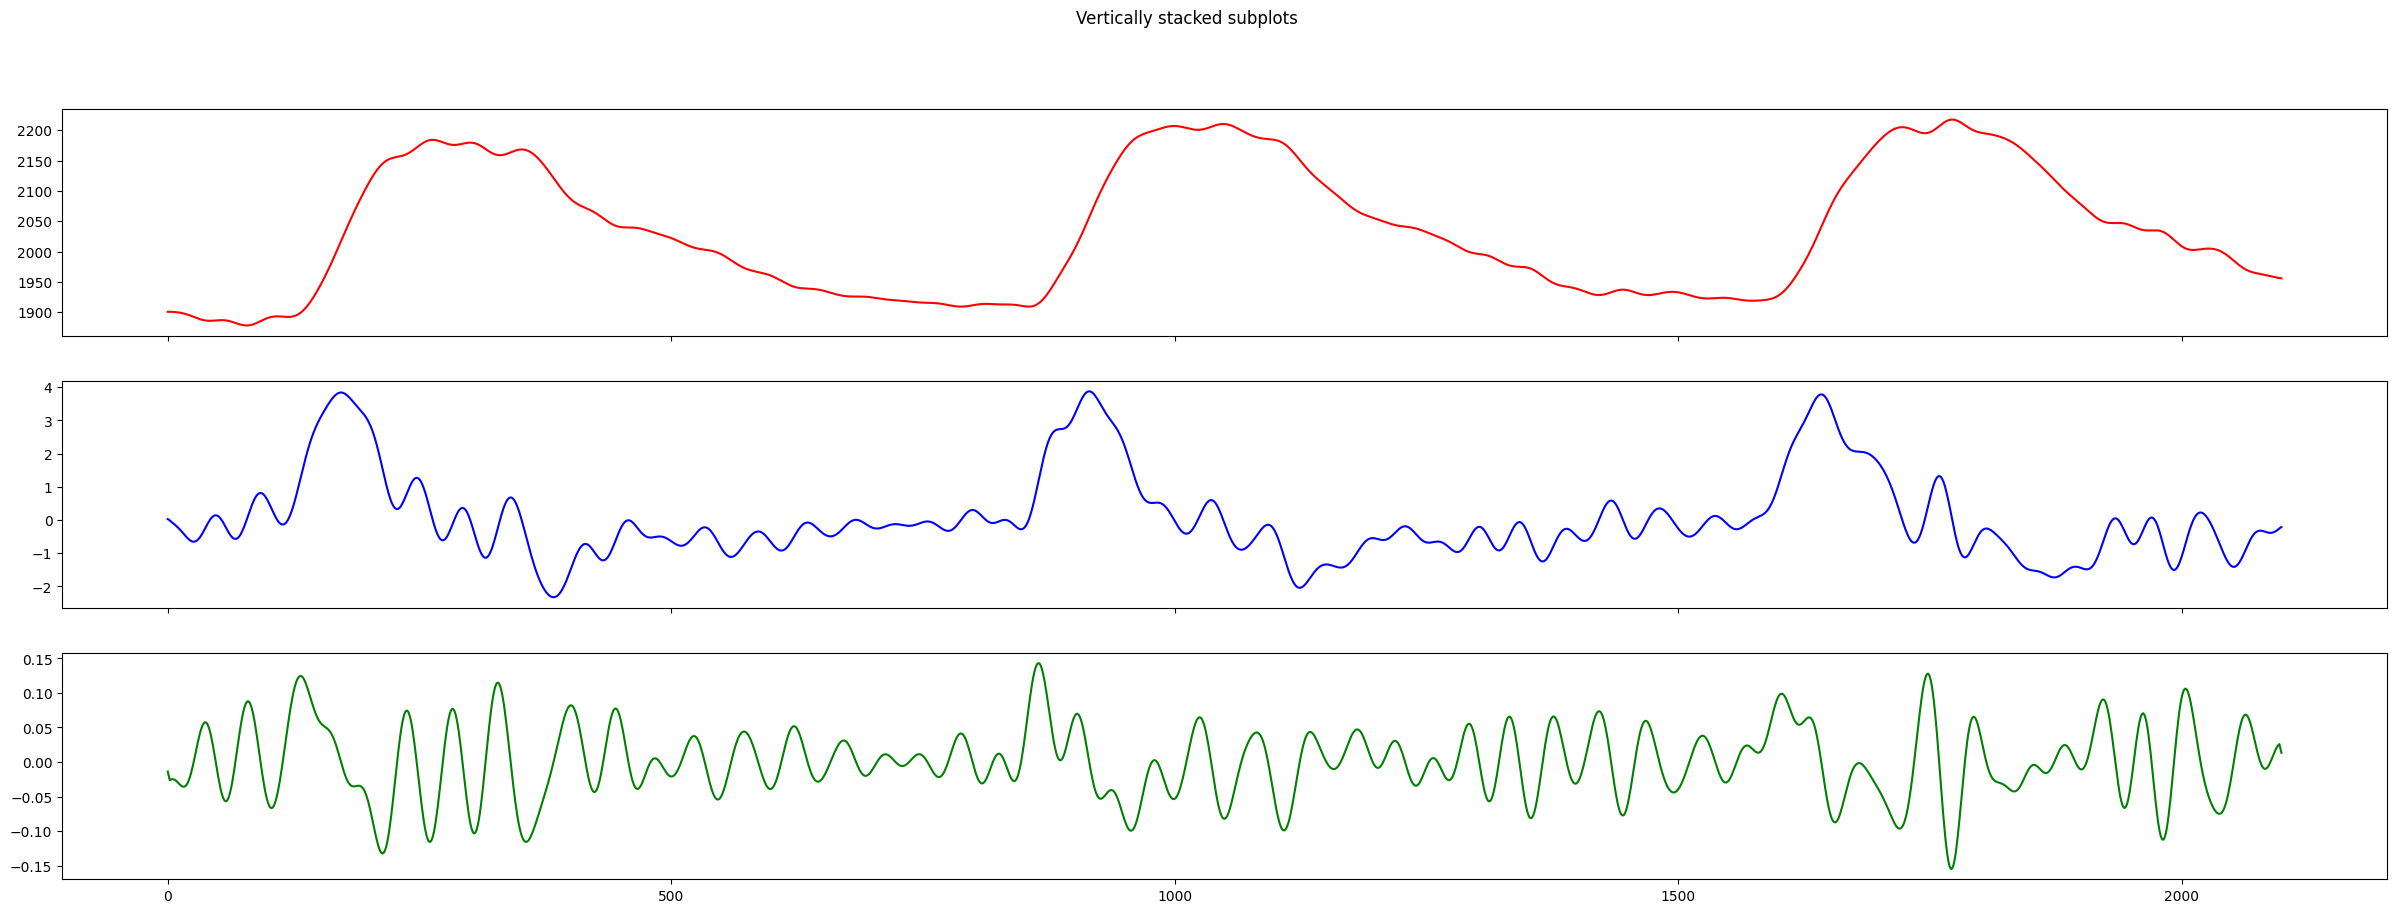

In [ ]:
fig, axs = plt.subplots(3,sharex=True)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(filtered,'r')
axs[1].plot(np.gradient(filtered),'b')
axs[2].plot(np.gradient(np.gradient(filtered)),'g')

PPG_acceleration

In [ ]:
data_ppg_acc = np.zeros((219,2100))
data_ppg_acc.shape

(219, 2100)

In [ ]:
for acc in range(0,len(data_ppg_norm)):
  acc_ = data_ppg_norm[acc]
  ppg_acc = np.gradient(np.gradient(acc_))
  data_ppg_acc[acc,:] = ppg_acc

PPG_velocity

In [ ]:
data_ppg_v = np.zeros((219,2100))
data_ppg_v.shape

(219, 2100)

In [ ]:
for vcc in range(0,len(data_ppg_norm)):
  vcc_ = data_ppg_norm[vcc]
  ppg_vcc = np.gradient(vcc_)
  data_ppg_v[vcc,:] = ppg_vcc

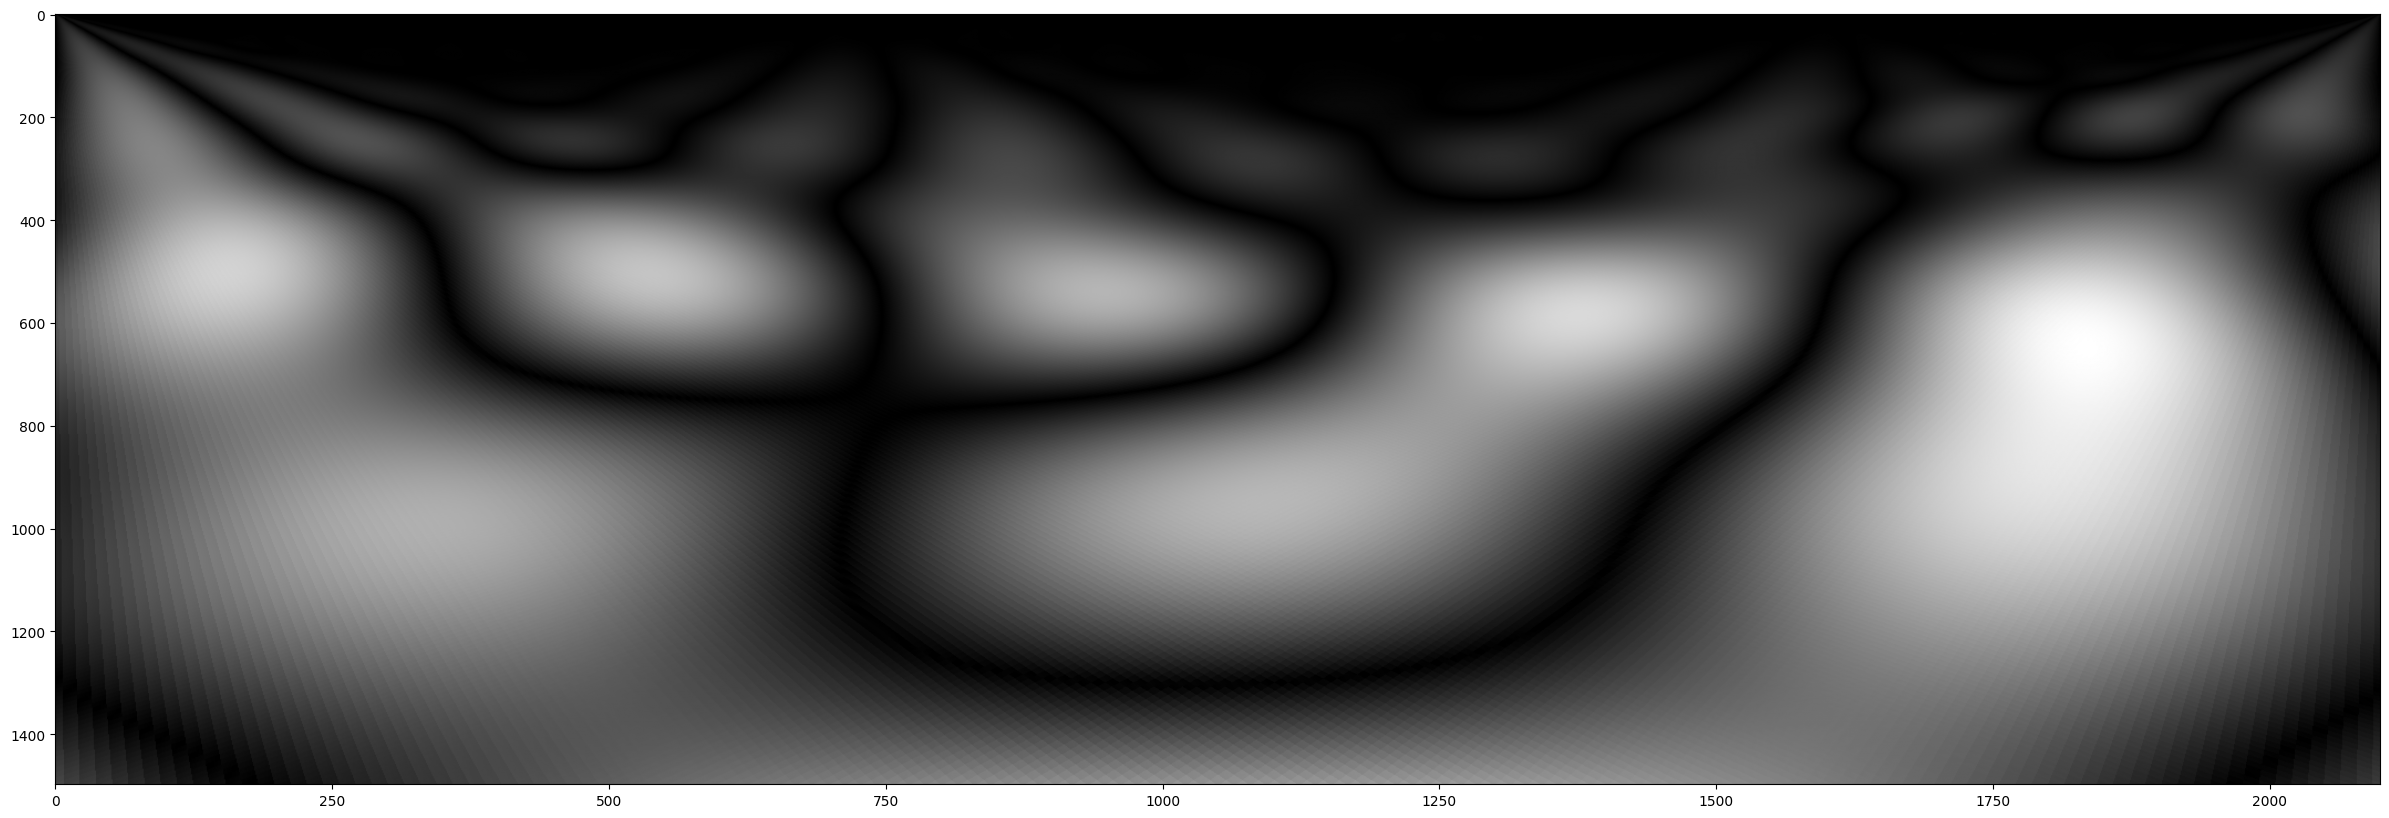

In [ ]:
import pywt
scales = range(2, 1500)
waveletname = 'gaus8'
wt = data_ppg_filtered[2]
coeff, freq = pywt.cwt(wt, scales, waveletname,sampling_period=1/1000,method='fft')
plt.imshow(abs(coeff),cmap = 'gray', aspect = 'auto')

In [ ]:
freq

array([300.        , 200.        , 150.        , ...,   0.4008016 ,
         0.40053405,   0.40026684])

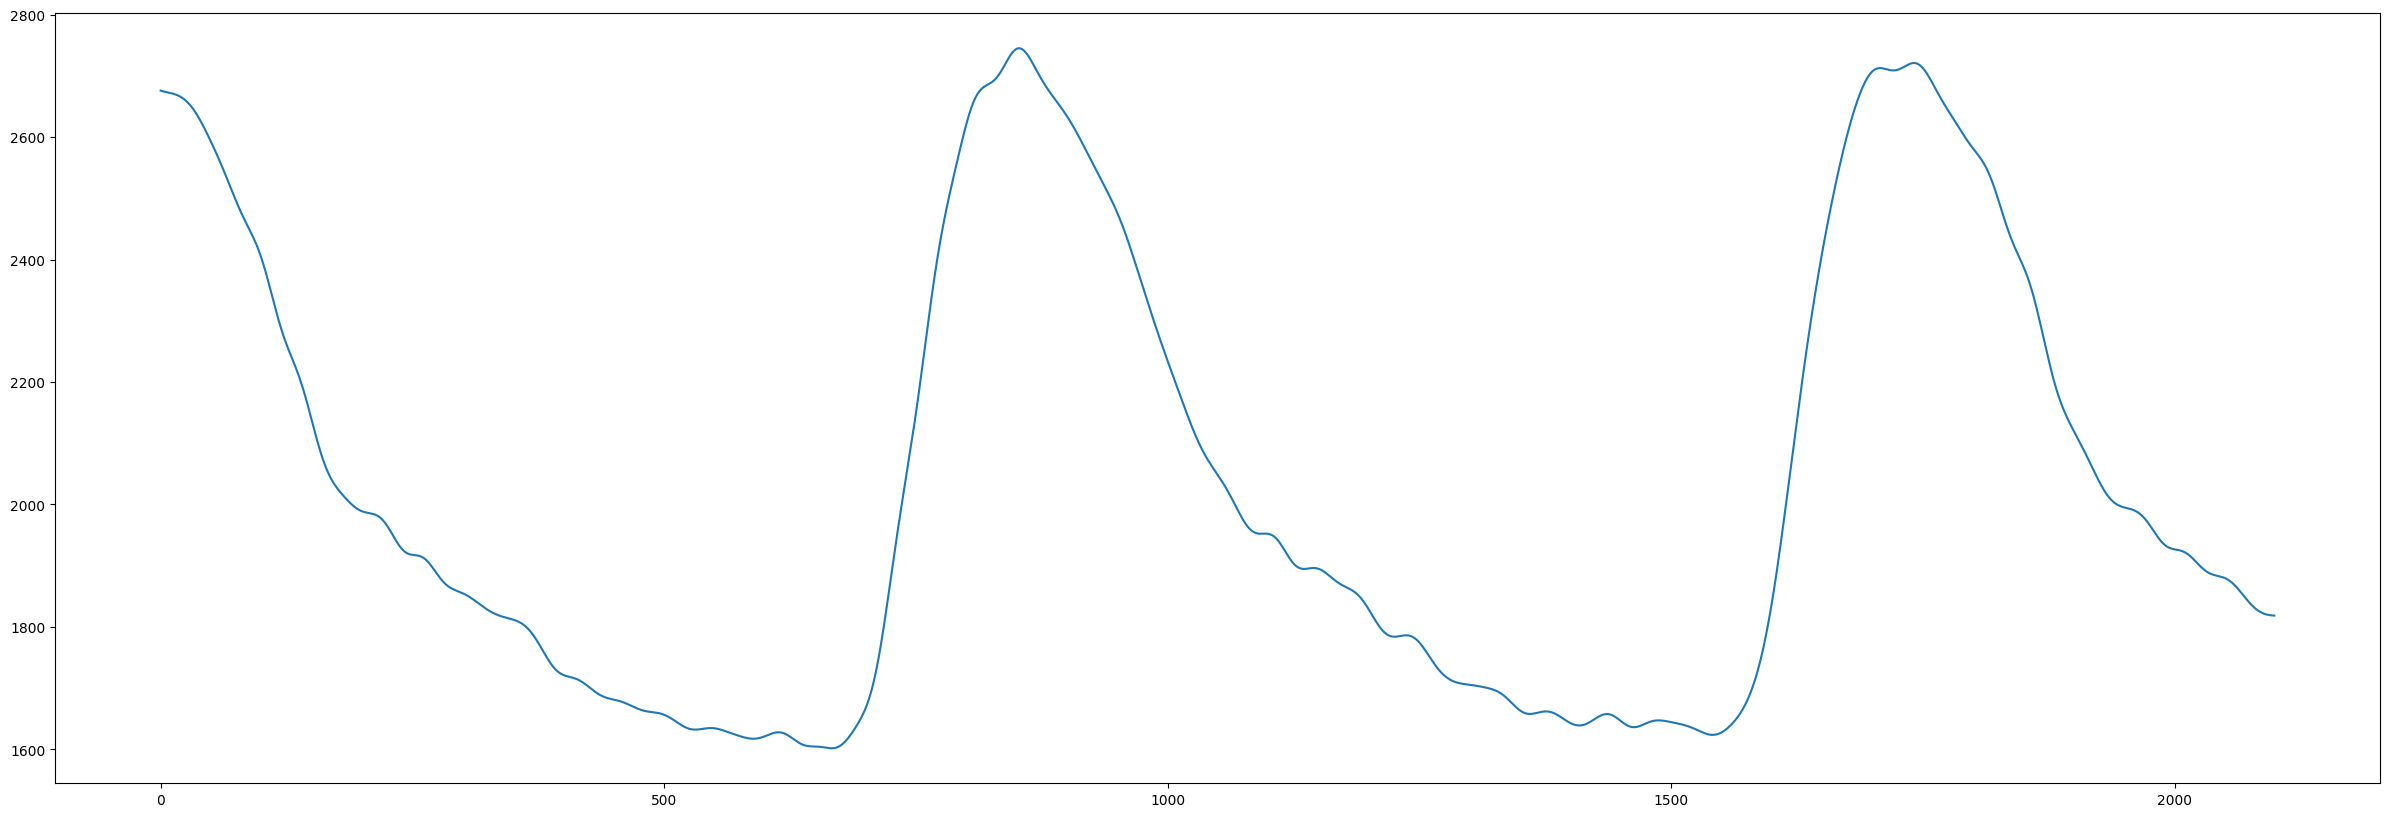

In [ ]:
plt.plot(wt)

In [ ]:
import time
start_time = time.time()
data_cwt = np.ndarray(shape=(166, 2000-1, 2100,1))
scales = range(2, 2001)
waveletname = 'cmor8-1.0'
for ii in range(0,166):
    if ii % 100 == 0:
        print(ii)
    signal = data_ppg_filtered[ii]
    coeff, freq = pywt.cwt(signal, scales, waveletname,method='fft',sampling_period=1/1000)
    coeff_ = abs(coeff[:,:2100])
    for jj in range(0,1):
        data_cwt[ii, :, :, jj] = coeff_
print("--- %s seconds ---" % (time.time() - start_time))

0


KeyboardInterrupt: 

In [ ]:
data_cwt.shape

(166, 1999, 2100, 1)

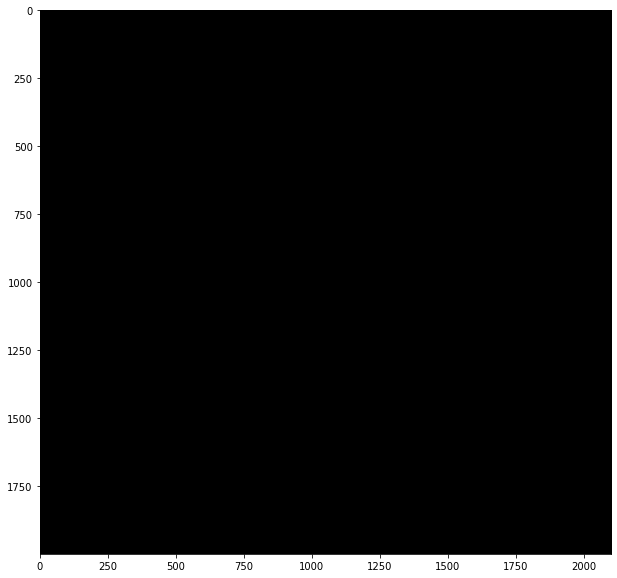

In [ ]:
plt.imshow(abs(data_cwt[90,:,:,0]),cmap = 'gray')

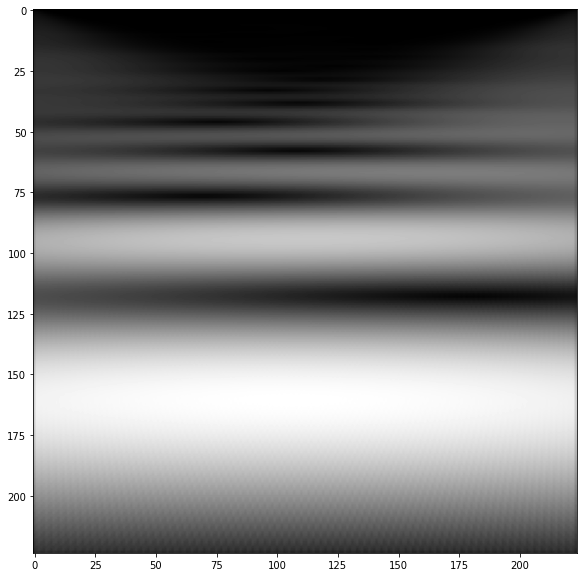

In [ ]:
from skimage.transform import resize
plt.imshow(abs(resize(data_cwt[15,:,:,0], (224, 224), mode = 'constant', anti_aliasing=True)),cmap = 'gray')

--- 5816.028245210648 seconds ---


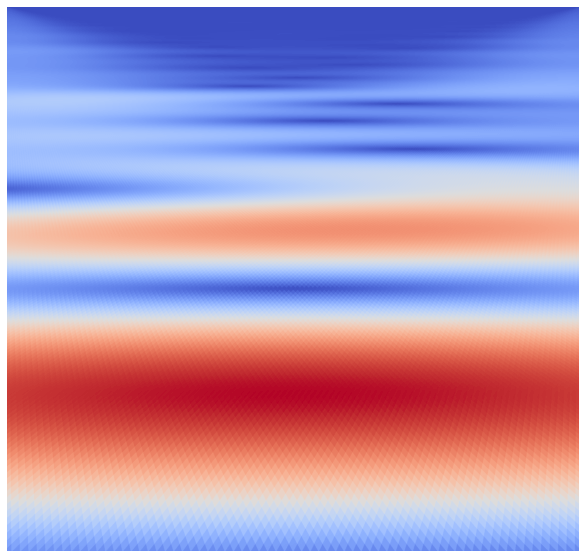

In [ ]:
start_time = time.time()
for k in range(0,166):
  plt.imshow(abs(data_cwt[k,:,:,0]),cmap = 'coolwarm')
  plt.axis('off')
  plt.savefig('/content/gdrive/MyDrive/SCALOGRAMS2'+'/'+str(k),bbox_inches='tight')
print("--- %s seconds ---" % (time.time() - start_time))

Wavelet Scattering

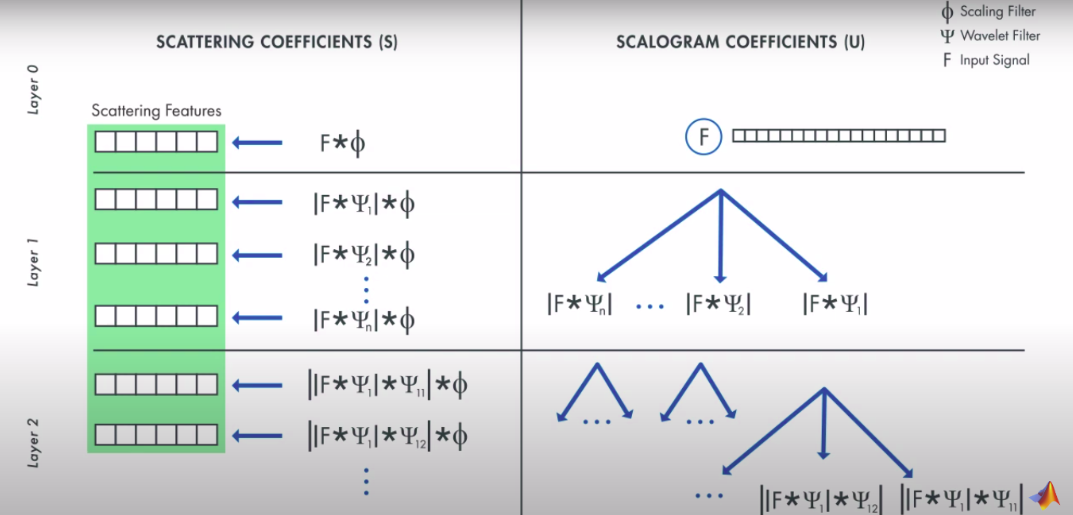

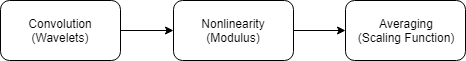

**Intall Kymatio**

In [ ]:
pip install kymatio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 2.9 MB/s eta 0:00:00


Text(0.5, 0, 'Samples')

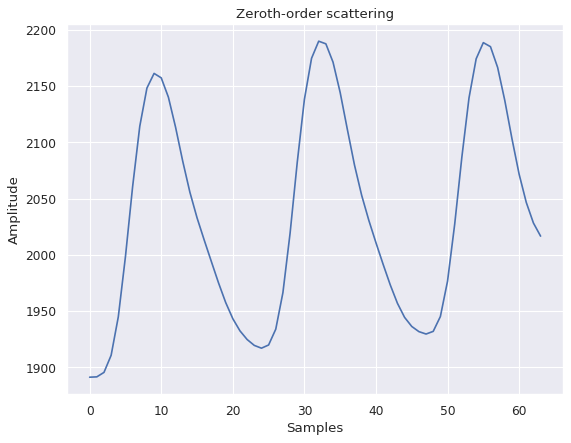

In [ ]:
from kymatio.numpy import Scattering1D
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
sns.set(font_scale=1)
T = 2048
J = 5
Q = 1
scattering = Scattering1D(J, T, Q)
Sx = scattering(data_ppg_filtered[85][0:2048])
meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)
plt.plot(Sx[order0][0])
plt.title('Zeroth-order scattering')
plt.ylabel('Amplitude')
plt.xlabel('Samples')

Text(0.5, 0, 'Samples')

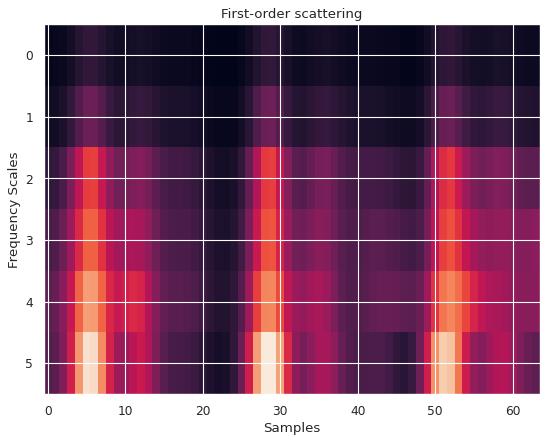

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.imshow(Sx[order1], aspect='auto')
plt.title('First-order scattering')
plt.title('First-order scattering')
plt.ylabel('Frequency Scales')
plt.xlabel('Samples')

Text(0.5, 0, 'Samples')

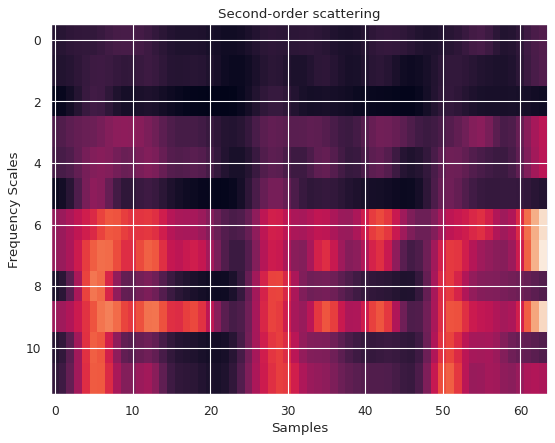

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.imshow(Sx[order2], aspect='auto')
plt.title('Second-order scattering')
plt.ylabel('Frequency Scales')
plt.xlabel('Samples')

(219, 19, 64)
(219, 19)


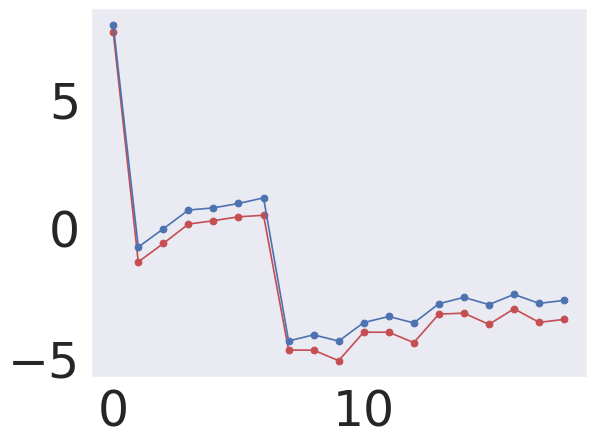

In [ ]:
figure(figsize=(8, 6), dpi=80)
Sx_all = scattering(data_ppg_filtered[:,0:2048])
print(Sx_all.shape)
log_eps = 1e-6
Sx_all = Sx_all[:,0:,:]
Sx_all = np.log(np.abs(Sx_all) + log_eps)
Sx_all = np.mean(Sx_all, axis=2)
print(Sx_all.shape)
plt.plot(Sx_all[1], 'r-o')
plt.plot(Sx_all[5], 'b-o')
plt.grid()

In [ ]:
box_df = pd.DataFrame(Sx_all[0:165])
classes = df_filtered.loc[:,['Hypertension']].values[0:165].T[0]
box_df['Hypertension Class'] = classes.tolist()

In [ ]:
box_df.shape

(165, 20)

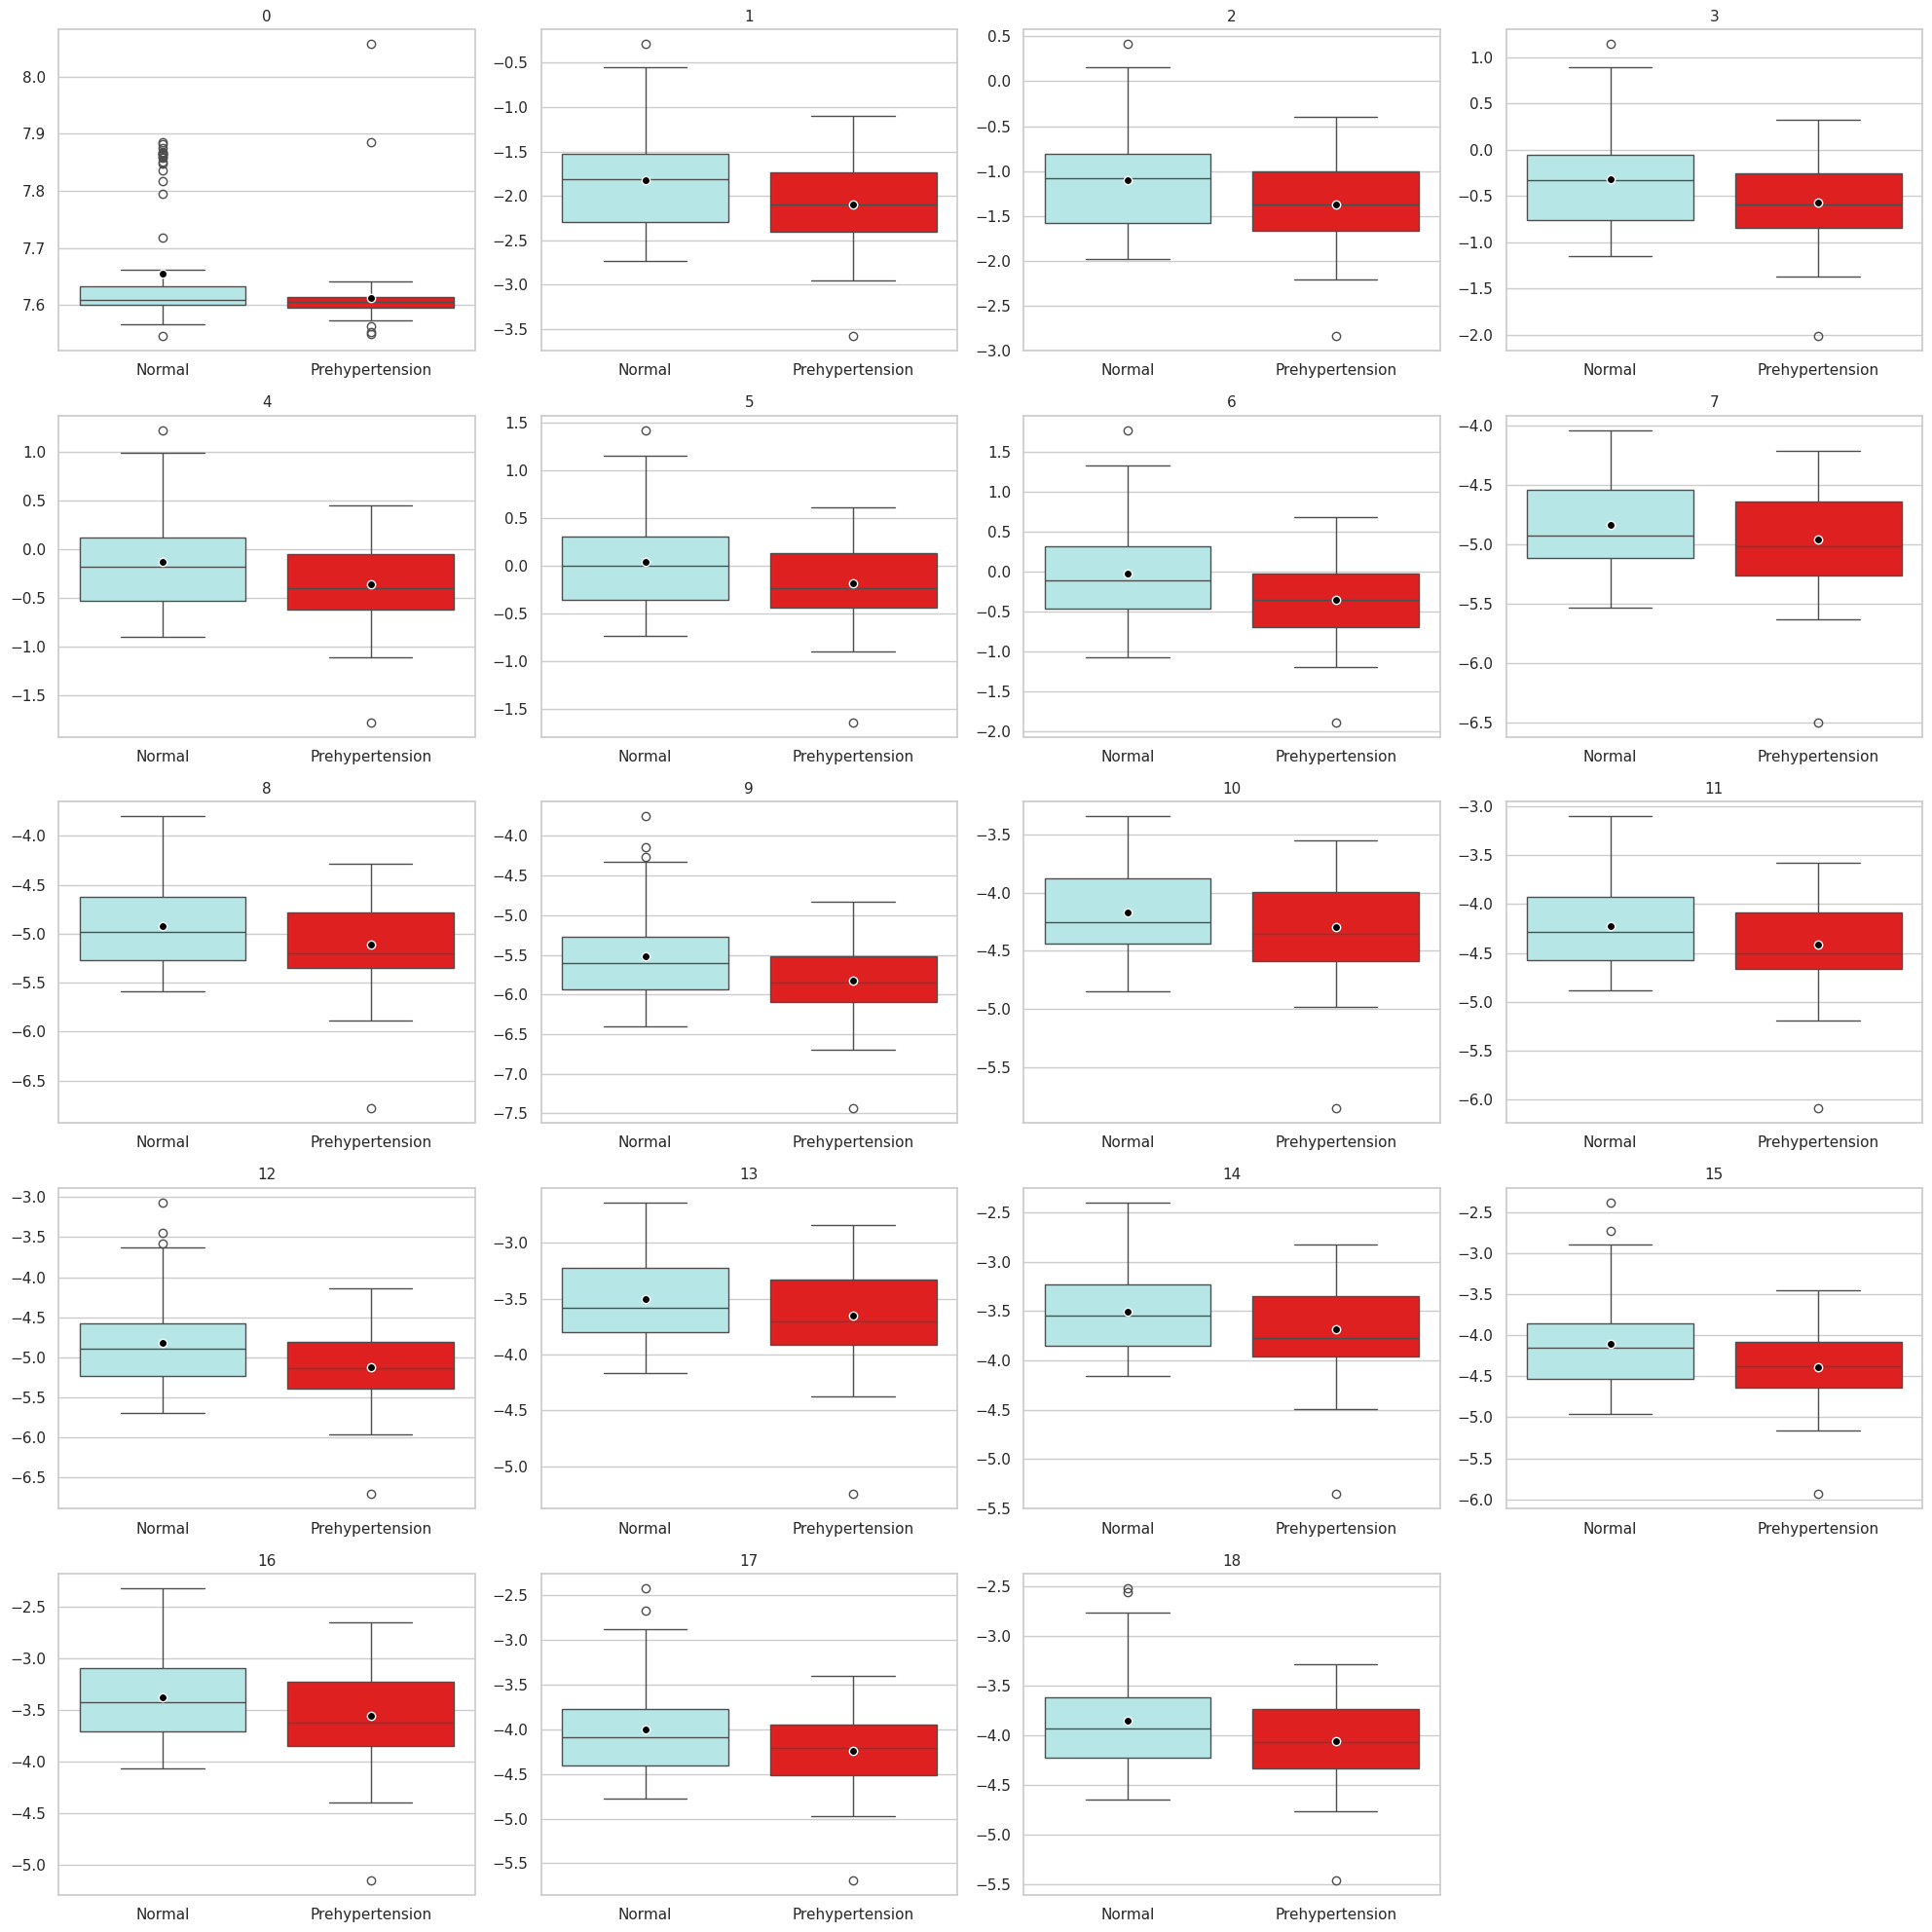

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1)

# Determine subplot grid size
n_features = 19
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Flatten to make indexing easy

for i in range(n_features):
    feature = box_df.columns[i]
    ax = axes[i]

    sns.boxplot(
        x="Hypertension Class",
        y=feature,
        hue="Hypertension Class",       # Explicit hue to fix deprecation warning
        data=box_df,
        palette=['paleturquoise', 'red'],
        showmeans=True,
        meanprops={
            "marker": "o",
            "markeredgecolor": "white",
            "markerfacecolor": "black",
            "markersize": 6
        },
        legend=False,
        ax=ax
    )
    ax.set_title(feature, fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Remove unused axes (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


/tmp/ipython-input-929063708.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="box", x="Hypertension Class", y=i, data=nor,showmeans=True, meanprops={"marker": "o",
/tmp/ipython-input-929063708.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="box", x="Hypertension Class", y=i, data=nor,showmeans=True, meanprops={"marker": "o",
/tmp/ipython-input-929063708.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="box", x="Hypertension Class", y=i, data=nor,showmeans=True, meanprops={"marker": "o",
/tmp/ipython-input-929063708

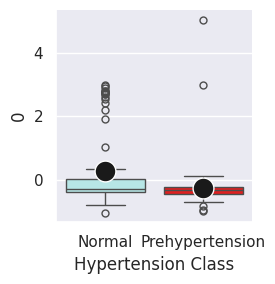

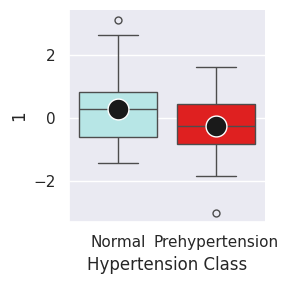

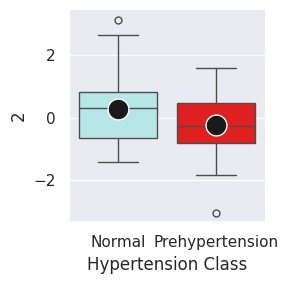

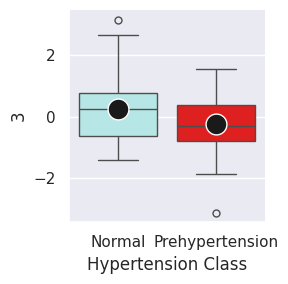

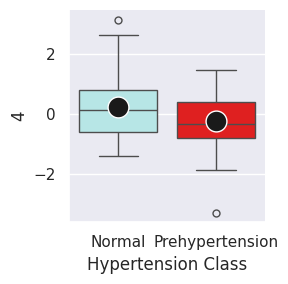

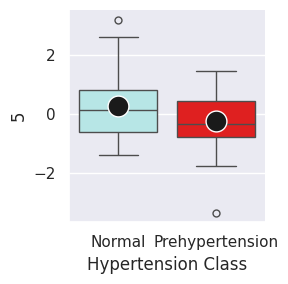

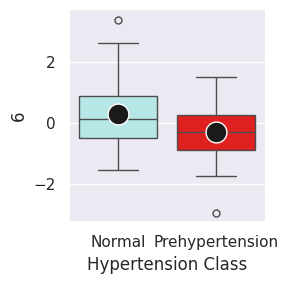

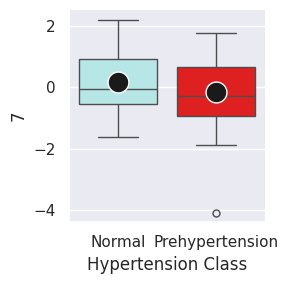

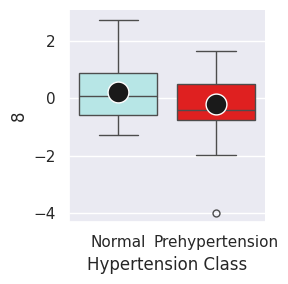

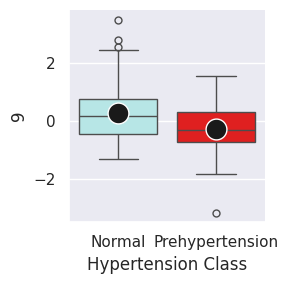

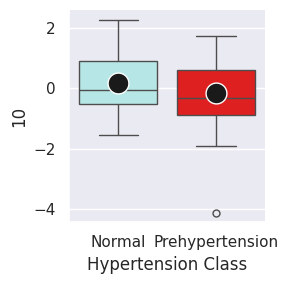

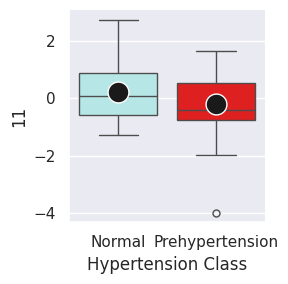

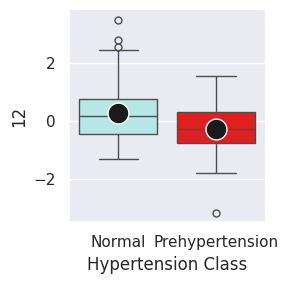

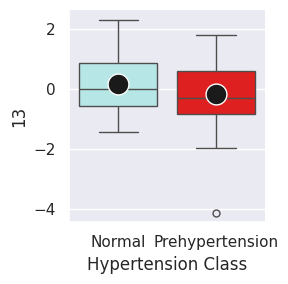

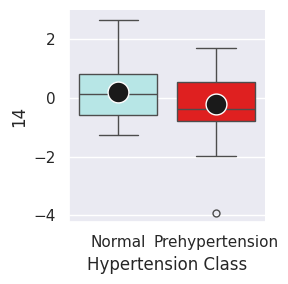

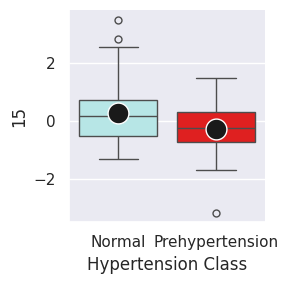

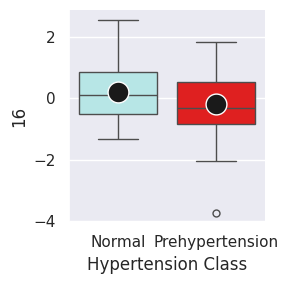

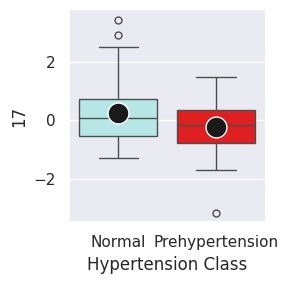

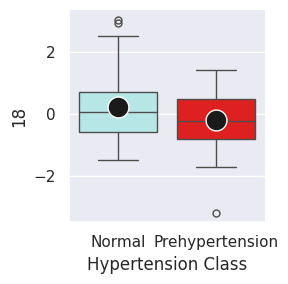

In [ ]:
from sklearn.preprocessing import StandardScaler
nor_box = StandardScaler()
nor_box.fit(Sx_all[0:165])
nor = pd.DataFrame(nor_box.transform(Sx_all[0:165]))
classes = df_filtered.loc[:,['Hypertension']].values[0:165].T[0]
nor['Hypertension Class'] = classes.tolist()
sns.set(font_scale=1)
for i in range(0,19):
  sns.catplot(kind="box", x="Hypertension Class", y=i, data=nor,showmeans=True, meanprops={"marker": "o",
                       "markeredgecolor": "white", "markerfacecolor":"k",
                       "markersize": "15"}, palette = ['paleturquoise','red'],height=3, aspect=1)


In [ ]:
import scipy
normal_0 = box_df[0][0:80]
pre_0 = box_df[0][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

TtestResult(statistic=np.float64(3.2859869299982534), pvalue=np.float64(0.0013124233074021496), df=np.float64(127.63984451846878)) NORMAL 7.654274794886722 PRE 7.6116922110562575 NORMAL 0.09959683183924707 PRE 0.05965655838273034
4177.0 -- 2623.0 p: 0.011348966372202302 NORMAL 7.608219793176536 PREHYPERTENSION 7.604446627444334 Z -2.533396355539218 0.011296314107345178


MannwhitneyuResult(statistic=np.float64(4177.0), pvalue=np.float64(0.011348966372202302))

In [ ]:
normal_0 = box_df[1][0:80]
pre_0 = box_df[1][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

TtestResult(statistic=np.float64(3.411189294346585), pvalue=np.float64(0.0008299988010440437), df=np.float64(151.03574972569712)) NORMAL -1.8228860386063324 PRE -2.100599348172244 NORMAL 0.572211037688198 PRE 0.4567301540194808
4230.0 -- 2570.0 p: 0.0068392490640006775 NORMAL -1.8076561570198069 PREHYPERTENSION -2.097400095651505 Z -2.706202027152575 0.0068057628425610885


MannwhitneyuResult(statistic=np.float64(4230.0), pvalue=np.float64(0.0068392490640006775))

In [ ]:
normal_1 = box_df[0][0:80]
pre_1 = box_df[0][80:165]
stats.ttest_ind(a=normal_1, b=pre_1, equal_var=False)

TtestResult(statistic=np.float64(3.2859869299982534), pvalue=np.float64(0.0013124233074021496), df=np.float64(127.63984451846878))

In [ ]:
normal_1 = box_df[1][0:80]
pre_1 = box_df[1][80:165]
stats.ttest_ind(a=normal_1, b=pre_1, equal_var=False)

TtestResult(statistic=np.float64(3.411189294346585), pvalue=np.float64(0.0008299988010440437), df=np.float64(151.03574972569712))

In [ ]:
U1, p = mannwhitneyu(normal_1, pre_1)
print(U1)
print(p)
nx, ny = len(normal_1), len(pre_1)
U2 = nx*ny - U1
print(U2)

4230.0
0.0068392490640006775
2570.0


/tmp/ipython-input-2856362592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(kind="box", x="Hypertension Class", y=2, data=box_df,showmeans=True, meanprops={"marker": "o",


AttributeError: FillBetweenPolyCollection.set() got an unexpected keyword argument 'kind'

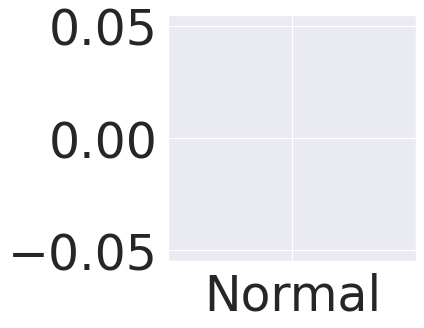

In [ ]:
figure(figsize=(4, 4), dpi=80)
sns.violinplot(kind="box", x="Hypertension Class", y=2, data=box_df,showmeans=True, meanprops={"marker": "o",
                       "markeredgecolor": "white", "markerfacecolor":"k",
                       "markersize": "4"}, palette = ['paleturquoise','red'],height=1, aspect=0.1, inner="quartile")

In [ ]:
normal_0 = box_df[2][0:80]
pre_0 = box_df[2][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=3.3923203805423654, pvalue=0.0008848761906247554) NORMAL -1.0980086263368807 PRE -1.3696680656437115 NORMAL 0.5627445435641283 PRE 0.4494004879654692
4214.0 -- 2586.0 p: 0.007992084291789669 NORMAL -1.0816572618493012 PREHYPERTENSION -1.3745402750816655 Z -2.6540342772315615 0.007953574704398269


MannwhitneyuResult(statistic=4214.0, pvalue=0.007992084291789669)

In [ ]:
normal_2 = box_df[2][0:80]
pre_2 = box_df[2][80:165]
stats.ttest_ind(a=normal_2, b=pre_2, equal_var=True)

Ttest_indResult(statistic=3.4153135752718016, pvalue=0.0008041599840478797)

In [ ]:
U1, p = mannwhitneyu(normal_2, pre_2)
print(U1)
print(p)
nx, ny = len(normal_2), len(pre_2)
U2 = nx*ny - U1
print(U2)

2586.0
0.003996042145894834
4214.0


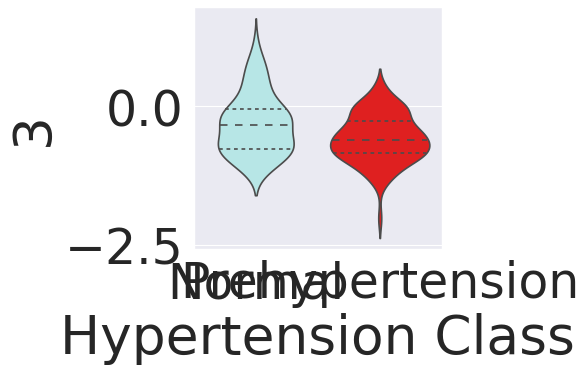

In [ ]:
figure(figsize=(4, 4), dpi=80)
sns.violinplot(kind="box", x="Hypertension Class", y=3, data=box_df,showmeans=True, meanprops={"marker": "o",
                       "markeredgecolor": "white", "markerfacecolor":"k",
                       "markersize": "4"}, palette = ['paleturquoise','red'],height=1, aspect=0.1, inner="quartile")

In [ ]:
normal_0 = box_df[3][0:80]
pre_0 = box_df[3][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=3.3363919706801903, pvalue=0.0010679017010941855) NORMAL -0.3184657485981397 PRE -0.5748027812407787 NORMAL 0.5391376244963869 PRE 0.4321816932434313
4216.0 -- 2584.0 p: 0.007839041039676156 NORMAL -0.32946091495513663 PREHYPERTENSION -0.5968720023162313 Z -2.660555245971688 0.007801192802055861


MannwhitneyuResult(statistic=4216.0, pvalue=0.007839041039676156)

In [ ]:
normal_3 = box_df[3][0:80]
pre_3 = box_df[3][80:165]
stats.ttest_ind(a=normal_3, b=pre_3, equal_var=True)

Ttest_indResult(statistic=3.3586369912517955, pvalue=0.0009752298017325189)

In [ ]:
U1, p = mannwhitneyu(normal_3, pre_3)
print(U1)
print(p)
nx, ny = len(normal_3), len(pre_3)
U2 = nx*ny - U1
print(U2)

2584.0
0.003919520519838078
4216.0


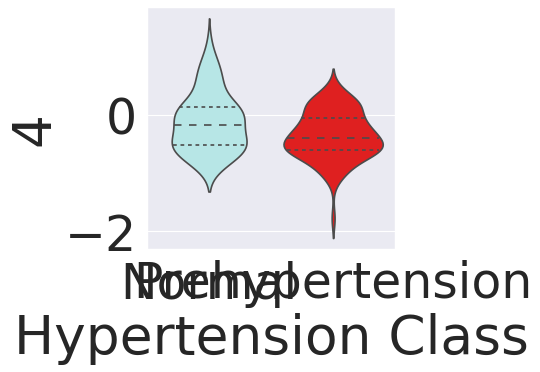

In [ ]:
figure(figsize=(4, 4), dpi=80)
sns.violinplot(kind="box", x="Hypertension Class", y=4, data=box_df,showmeans=True, meanprops={"marker": "o",
                       "markeredgecolor": "white", "markerfacecolor":"k",
                       "markersize": "4"}, palette = ['paleturquoise','red'],height=1, aspect=0.1, inner="quartile")

In [ ]:
normal_0 = box_df[4][0:80]
pre_0 = box_df[4][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=3.203212096434952, pvalue=0.001654789702337515) NORMAL -0.1273061650331821 PRE -0.35669790617164066 NORMAL 0.49952564006709493 PRE 0.40677907111473316
4176.0 -- 2624.0 p: 0.011454924958216041 NORMAL -0.1763398598266226 PREHYPERTENSION -0.39714011634725266 Z -2.5301358711691546 0.011401836402636579


MannwhitneyuResult(statistic=4176.0, pvalue=0.011454924958216041)

In [ ]:
normal_4 = box_df[4][0:80]
pre_4 = box_df[4][80:165]
stats.ttest_ind(a=normal_4, b=pre_4, equal_var=True)

Ttest_indResult(statistic=3.223090782926166, pvalue=0.0015317551640580867)

In [ ]:
del U1,p
U1, p = mannwhitneyu(normal_4, pre_4)
print(U1)
print(p)
nx, ny = len(normal_4), len(pre_4)
U2 = nx*ny - U1
print(U2)

2624.0
0.005727462479108021
4176.0


In [ ]:
normal_0 = box_df[5][0:80]
pre_0 = box_df[5][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=3.2581886259373927, pvalue=0.0013846282522206705) NORMAL 0.04526622684166552 PRE -0.18621325831342503 NORMAL 0.49878488048735814 PRE 0.3993169187606778
4208.0 -- 2592.0 p: 0.008467394430029864 NORMAL -0.004945105804786352 PREHYPERTENSION -0.2349840491675201 Z -2.6344713710111813 0.008426840992650661


MannwhitneyuResult(statistic=4208.0, pvalue=0.008467394430029864)

In [ ]:
normal_5 = box_df[5][0:80]
pre_5 = box_df[5][80:165]
stats.ttest_ind(a=normal_5, b=pre_5, equal_var=True)

Ttest_indResult(statistic=3.2800355419486924, pvalue=0.0012692441810414987)

In [ ]:
del U1,p
U1, p = mannwhitneyu(normal_5, pre_5)
print(U1)
print(p)
nx, ny = len(normal_5), len(pre_5)
U2 = nx*ny - U1
print(U2)

2592.0
0.004233697215014932
4208.0


In [ ]:
normal_0 = box_df[6][0:80]
pre_0 = box_df[6][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=3.760550244028713, pvalue=0.00024459951350932775) NORMAL -0.022300153659254498 PRE -0.35105457491188735 NORMAL 0.628458598883324 PRE 0.47118960954613426
4343.0 -- 2457.0 p: 0.0021191385849118577 NORMAL -0.11207073178393057 PREHYPERTENSION -0.35192418411821713 Z -3.074636760969733 0.0021075906836843373


MannwhitneyuResult(statistic=4343.0, pvalue=0.0021191385849118577)

In [ ]:
normal_6 = box_df[6][0:80]
pre_6 = box_df[6][80:165]
stats.ttest_ind(a=normal_6, b=pre_6, equal_var=True)

Ttest_indResult(statistic=3.792868154724857, pvalue=0.00020947316229529957)

In [ ]:
del U1,p
U1, p = mannwhitneyu(normal_6, pre_6)
print(U1)
print(p)
nx, ny = len(normal_6), len(pre_6)
U2 = nx*ny - U1
print(U2)

2457.0
0.0010595692924559288
4343.0


In [ ]:
normal_0 = box_df[7][0:80]
pre_0 = box_df[7][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=2.049145172094754, pvalue=0.042052100084504655) NORMAL -4.837848567217643 PRE -4.962119166496591 NORMAL 0.38037265774408385 PRE 0.39382351249612635
3959.0 -- 2841.0 p: 0.06860981796181798 NORMAL -4.924246958806064 PREHYPERTENSION -5.0155207300965525 Z -1.822610762865409 0.06836236436260767


MannwhitneyuResult(statistic=3959.0, pvalue=0.06860981796181798)

In [ ]:
normal_7 = box_df[7][0:80]
pre_7 = box_df[7][80:165]
print(stats.ttest_ind(a=normal_7, b=pre_7, equal_var=True))
del U1,p
U1, p = mannwhitneyu(normal_7, pre_7)
print(U1)
print(p)
nx, ny = len(normal_7), len(pre_7)
U2 = nx*ny - U1
print(U2)

Ttest_indResult(statistic=2.0469992677252673, pvalue=0.04226379555392529)
2841.0
0.03430490898090899
3959.0


In [ ]:
normal_0 = box_df[8][0:80]
pre_0 = box_df[8][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=2.717304754102868, pvalue=0.007303785005339432) NORMAL -4.921972145621285 PRE -5.106384503093364 NORMAL 0.4455418007669226 PRE 0.4193022707231882
4088.0 -- 2712.0 p: 0.02498833541834493 NORMAL -4.982362286671563 PREHYPERTENSION -5.196593202386627 Z -2.24321324660358 0.024883066491980844


MannwhitneyuResult(statistic=4088.0, pvalue=0.02498833541834493)

In [ ]:
normal_8 = box_df[8][0:80]
pre_8 = box_df[8][80:165]
print(stats.ttest_ind(a=normal_8, b=pre_8, equal_var=True))
del U1,p
U1, p = mannwhitneyu(normal_8, pre_8)
print(U1)
print(p)
nx, ny = len(normal_8), len(pre_8)
U2 = nx*ny - U1
print(U2)

Ttest_indResult(statistic=2.722362845936493, pvalue=0.007187131116149046)
2712.0
0.012494167709172464
4088.0


In [ ]:
normal_0 = box_df[9][0:80]
pre_0 = box_df[9][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=3.637873082502768, pvalue=0.00037870588709622646) NORMAL -5.523601586270525 PRE -5.829310869320465 NORMAL 0.5983012171674892 PRE 0.46106410146704824
4272.0 -- 2528.0 p: 0.00449001440496036 NORMAL -5.598609815433713 PREHYPERTENSION -5.85183957260845 Z -2.8431423706952352 0.004467111100565613


MannwhitneyuResult(statistic=4272.0, pvalue=0.00449001440496036)

In [ ]:
normal_9 = box_df[9][0:80]
pre_9 = box_df[9][80:165]
print(stats.ttest_ind(a=normal_9, b=pre_9, equal_var=True))
del U1,p
U1, p = mannwhitneyu(normal_9, pre_9)
print(U1)
print(p)
nx, ny = len(normal_9), len(pre_9)
U2 = nx*ny - U1
print(U2)

Ttest_indResult(statistic=3.666286943605575, pvalue=0.0003326742053957436)
2528.0
0.00224500720248018
4272.0


In [ ]:
normal_0 = box_df[10][0:80]
pre_0 = box_df[10][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=2.150638087613774, pvalue=0.03298005351439162) NORMAL -4.165779303048704 PRE -4.297072600015254 NORMAL 0.3842460748121191 PRE 0.3950593362384584
4018.0 -- 2782.0 p: 0.04407791650025227 NORMAL -4.2522379637215835 PREHYPERTENSION -4.356558685257164 Z -2.014979340699146 0.043906813777049095


MannwhitneyuResult(statistic=4018.0, pvalue=0.04407791650025227)

In [ ]:
normal_10 = box_df[10][0:80]
pre_10 = box_df[10][80:165]
print(stats.ttest_ind(a=normal_10, b=pre_10, equal_var=True))
del U1,p
U1, p = mannwhitneyu(normal_10, pre_10)
print(U1)
print(p)
nx, ny = len(normal_10), len(pre_10)
U2 = nx*ny - U1
print(U2)

Ttest_indResult(statistic=2.148843926524634, pvalue=0.03312275854076555)
2782.0
0.022038958250126136
4018.0


In [ ]:
normal_0 = box_df[11][0:80]
pre_0 = box_df[11][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=2.7236874757556486, pvalue=0.007170024136882491) NORMAL -4.225774267319404 PRE -4.411840010084197 NORMAL 0.44810696807733774 PRE 0.42249459856371907
4093.0 -- 2707.0 p: 0.02395280344697408 NORMAL -4.283898659098261 PREHYPERTENSION -4.50133725808608 Z -2.259515668453897 0.02385132678073516


MannwhitneyuResult(statistic=4093.0, pvalue=0.02395280344697408)

In [ ]:
normal_11 = box_df[11][0:80]
pre_11 = box_df[11][80:165]
print(stats.ttest_ind(a=normal_11, b=pre_11, equal_var=True))
del U1,p
U1, p = mannwhitneyu(normal_11, pre_11)
print(U1)
print(p)
nx, ny = len(normal_11), len(pre_11)
U2 = nx*ny - U1
print(U2)

Ttest_indResult(statistic=2.728604613144317, pvalue=0.0070584375079218295)
2707.0
0.01197640172348704
4093.0


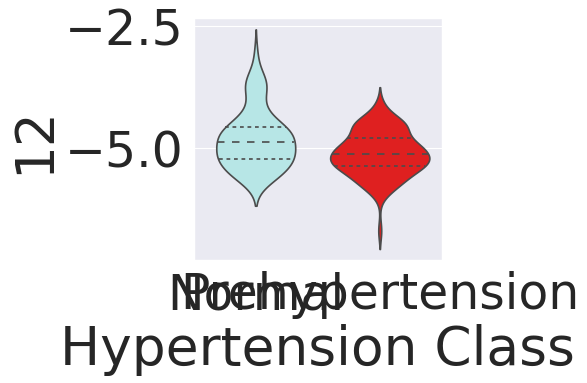

In [ ]:
figure(figsize=(4, 4), dpi=80)
sns.violinplot(kind="box", x="Hypertension Class", y=12, data=box_df,showmeans=True, meanprops={"marker": "o",
                       "markeredgecolor": "white", "markerfacecolor":"k",
                       "markersize": "4"}, palette = ['paleturquoise','red'],height=1, aspect=0.1, inner="quartile")

In [ ]:
normal_0 = box_df[12][0:80]
pre_0 = box_df[12][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=3.606203078162855, pvalue=0.0004239539521286433) NORMAL -4.8252563782846085 PRE -5.1264397330775076 NORMAL 0.5952103299160151 PRE 0.45741184513186145
4268.0 -- 2532.0 p: 0.004677105658805641 NORMAL -4.890455262810171 PREHYPERTENSION -5.137011440741668 Z -2.830100433214982 0.0046533394304364185


MannwhitneyuResult(statistic=4268.0, pvalue=0.004677105658805641)

In [ ]:
normal_12 = box_df[12][0:80]
pre_12 = box_df[12][80:165]
print(stats.ttest_ind(a=normal_12, b=pre_12, equal_var=True))
del U1,p
U1, p = mannwhitneyu(normal_12, pre_12)
print(U1)
print(p)
nx, ny = len(normal_12), len(pre_12)
U2 = nx*ny - U1
print(U2)

Ttest_indResult(statistic=3.634656737826543, pvalue=0.00037276308837256206)
2532.0
0.0023385528294028205
4268.0


In [ ]:
normal_0 = box_df[13][0:80]
pre_0 = box_df[13][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=2.325704346076259, pvalue=0.021267965831693665) NORMAL -3.502716484910837 PRE -3.6482404254611884 NORMAL 0.39457378137763227 PRE 0.40415235028232255
4032.0 -- 2768.0 p: 0.039494633198730436 NORMAL -3.578397516462325 PREHYPERTENSION -3.70063866058563 Z -2.060626121880033 0.03933872268861973


MannwhitneyuResult(statistic=4032.0, pvalue=0.039494633198730436)

In [ ]:
normal_13 = box_df[13][0:80]
pre_13 = box_df[13][80:165]
print(stats.ttest_ind(a=normal_13, b=pre_13, equal_var=True))
del U1,p
U1, p = mannwhitneyu(normal_13, pre_13)
print(U1)
print(p)
nx, ny = len(normal_13), len(pre_13)
U2 = nx*ny - U1
print(U2)

Ttest_indResult(statistic=2.3240308673423207, pvalue=0.021358096352059826)
2768.0
0.019747316599365218
4032.0


In [ ]:
normal_0 = box_df[14][0:80]
pre_0 = box_df[14][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=2.709248017016382, pvalue=0.007473080694528741) NORMAL -3.5008822662698855 PRE -3.687610239298727 NORMAL 0.4495909486240932 PRE 0.42906898787640907
4094.0 -- 2706.0 p: 0.023750223221971747 NORMAL -3.543414863851085 PREHYPERTENSION -3.770676561990623 Z -2.2627761528239603 0.02364949166656279


MannwhitneyuResult(statistic=4094.0, pvalue=0.023750223221971747)

In [ ]:
normal_14 = box_df[14][0:80]
pre_14 = box_df[14][80:165]
print(stats.ttest_ind(a=normal_14, b=pre_14, equal_var=True))
del U1,p
U1, p = mannwhitneyu(normal_14, pre_14)
print(U1)
print(p)
nx, ny = len(normal_14), len(pre_14)
U2 = nx*ny - U1
print(U2)

Ttest_indResult(statistic=2.713137918940423, pvalue=0.007381226096642872)
2706.0
0.011875111610985874
4094.0


In [ ]:
normal_0 = box_df[15][0:80]
pre_0 = box_df[15][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=3.4976713851391694, pvalue=0.0006201569622740652) NORMAL -4.1057522368568735 PRE -4.390626294410491 NORMAL 0.5812038569028815 PRE 0.44502017392574444
4234.0 -- 2566.0 p: 0.006575455433485071 NORMAL -4.157327510727605 PREHYPERTENSION -4.379799732942571 Z -2.7192439646328284 0.006543132870564599


MannwhitneyuResult(statistic=4234.0, pvalue=0.006575455433485071)

In [ ]:
normal_15 = box_df[15][0:80]
pre_15 = box_df[15][80:165]
print(stats.ttest_ind(a=normal_15, b=pre_15, equal_var=True))
del U1,p
U1, p = mannwhitneyu(normal_15, pre_15)
print(U1)
print(p)
nx, ny = len(normal_15), len(pre_15)
U2 = nx*ny - U1
print(U2)

Ttest_indResult(statistic=3.525634812881386, pvalue=0.0005486827537980377)
2566.0
0.0032877277167425354
4234.0


In [ ]:
normal_0 = box_df[16][0:80]
pre_0 = box_df[16][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=2.652935926767338, pvalue=0.008773448153400639) NORMAL -3.3778461388164516 PRE -3.5606505943940117 NORMAL 0.4428529894983116 PRE 0.43624443761197546
4121.0 -- 2679.0 p: 0.018814859927927023 NORMAL -3.4261241282065904 PREHYPERTENSION -3.6188063209642376 Z -2.3508092308156705 0.018732635136716053


MannwhitneyuResult(statistic=4121.0, pvalue=0.018814859927927023)

In [ ]:
normal_16 = box_df[16][0:80]
pre_16 = box_df[16][80:165]
print(stats.ttest_ind(a=normal_16, b=pre_16, equal_var=True))
del U1,p
U1, p = mannwhitneyu(normal_16, pre_16)
print(U1)
print(p)
nx, ny = len(normal_16), len(pre_16)
U2 = nx*ny - U1
print(U2)

Ttest_indResult(statistic=2.6541823472524366, pvalue=0.008737785064813451)
2679.0
0.009407429963963512
4121.0


In [ ]:
normal_0 = box_df[17][0:80]
pre_0 = box_df[17][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

Ttest_indResult(statistic=3.225742027537793, pvalue=0.0015444651349219214) NORMAL -3.9986046964076936 PRE -4.2433529652681194 NORMAL 0.5384447332084981 PRE 0.4186856212259522
4165.0 -- 2635.0 p: 0.012679722507205412 NORMAL -4.092470356162453 PREHYPERTENSION -4.209102251930834 Z -2.4942705430984575 0.012621630207674572


MannwhitneyuResult(statistic=4165.0, pvalue=0.012679722507205412)

In [ ]:
normal_17 = box_df[17][0:80]
pre_17 = box_df[17][80:165]
print(stats.ttest_ind(a=normal_17, b=pre_17, equal_var=True))
del U1,p
U1, p = mannwhitneyu(normal_17, pre_17)
print(U1)
print(p)
nx, ny = len(normal_17), len(pre_17)
U2 = nx*ny - U1
print(U2)

Ttest_indResult(statistic=3.2501016936220513, pvalue=0.0014015075074633198)
2635.0
0.006339861253602706
4165.0


In [ ]:
normal_0 = box_df[18][0:80]
pre_0 = box_df[18][80:165]
print(scipy.stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False),'NORMAL' ,np.mean(normal_0),'PRE' ,np.mean(pre_0),'NORMAL' ,np.std(normal_0), 'PRE',np.std(pre_0))
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx*ny - U1
m_u = len(normal_0)*len(pre_0)/2
sigma_u = np.sqrt(len(normal_0)*len(pre_0)*(len(normal_0)+len(pre_0)+1)/12)
z = (U2 - m_u)/sigma_u
print(U1,"--",U2,'p:' ,p,'NORMAL',np.median(normal_0),'PREHYPERTENSION' ,np.median(pre_0),'Z',z, 2*scipy.stats.norm.cdf(z))
mannwhitneyu(normal_0, pre_0, alternative='two-sided')

TtestResult(statistic=np.float64(2.764969335597669), pvalue=np.float64(0.006349800112104864), df=np.float64(162.88304142499186)) NORMAL -1.4625900353099044 PRE -1.8406792764153215 NORMAL 0.8343585748223814 PRE 0.9112978810022043
4090.0 -- 2710.0 p: 0.02456956079507437 NORMAL -1.4925324651123661 PREHYPERTENSION -1.7663079823114876 Z -2.249734215343707 0.024465822180610657


MannwhitneyuResult(statistic=np.float64(4090.0), pvalue=np.float64(0.02456956079507437))

In [ ]:
normal_18 = box_df[18][0:80]
pre_18 = box_df[18][80:165]
print(stats.ttest_ind(a=normal_18, b=pre_18, equal_var=True))
del U1,p
U1, p = mannwhitneyu(normal_18, pre_18)
print(U1)
print(p)
nx, ny = len(normal_18), len(pre_18)
U2 = nx*ny - U1
print(U2)

TtestResult(statistic=np.float64(2.757593749505575), pvalue=np.float64(0.006487682798770241), df=np.float64(163.0))
4090.0
0.02456956079507437
2710.0


In [ ]:
T = 2048
from kymatio.scattering1d.filter_bank import scattering_filter_factory
Q = (1,1)
phi_f, psi1_f, psi2_f = scattering_filter_factory(np.log(T), J, Q, np.log(T))
print(phi_f)
plt.figure()
plt.plot(np.arange(T)/T, phi_f[0], 'r')

for psi_f in psi1_f:
    plt.plot(np.arange(T)/T, psi_f[0], 'b')

plt.xlim(0, 0.6)

plt.xlabel(r'$\omega$', fontsize=18)
plt.ylabel(r'$\hat\psi_j(\omega)$', fontsize=18)
plt.title('First-order filters (Q = {})'.format(Q), fontsize=18)

ValueError: cannot reshape array of size 23 into shape (3,7)

(0.0, 0.6)

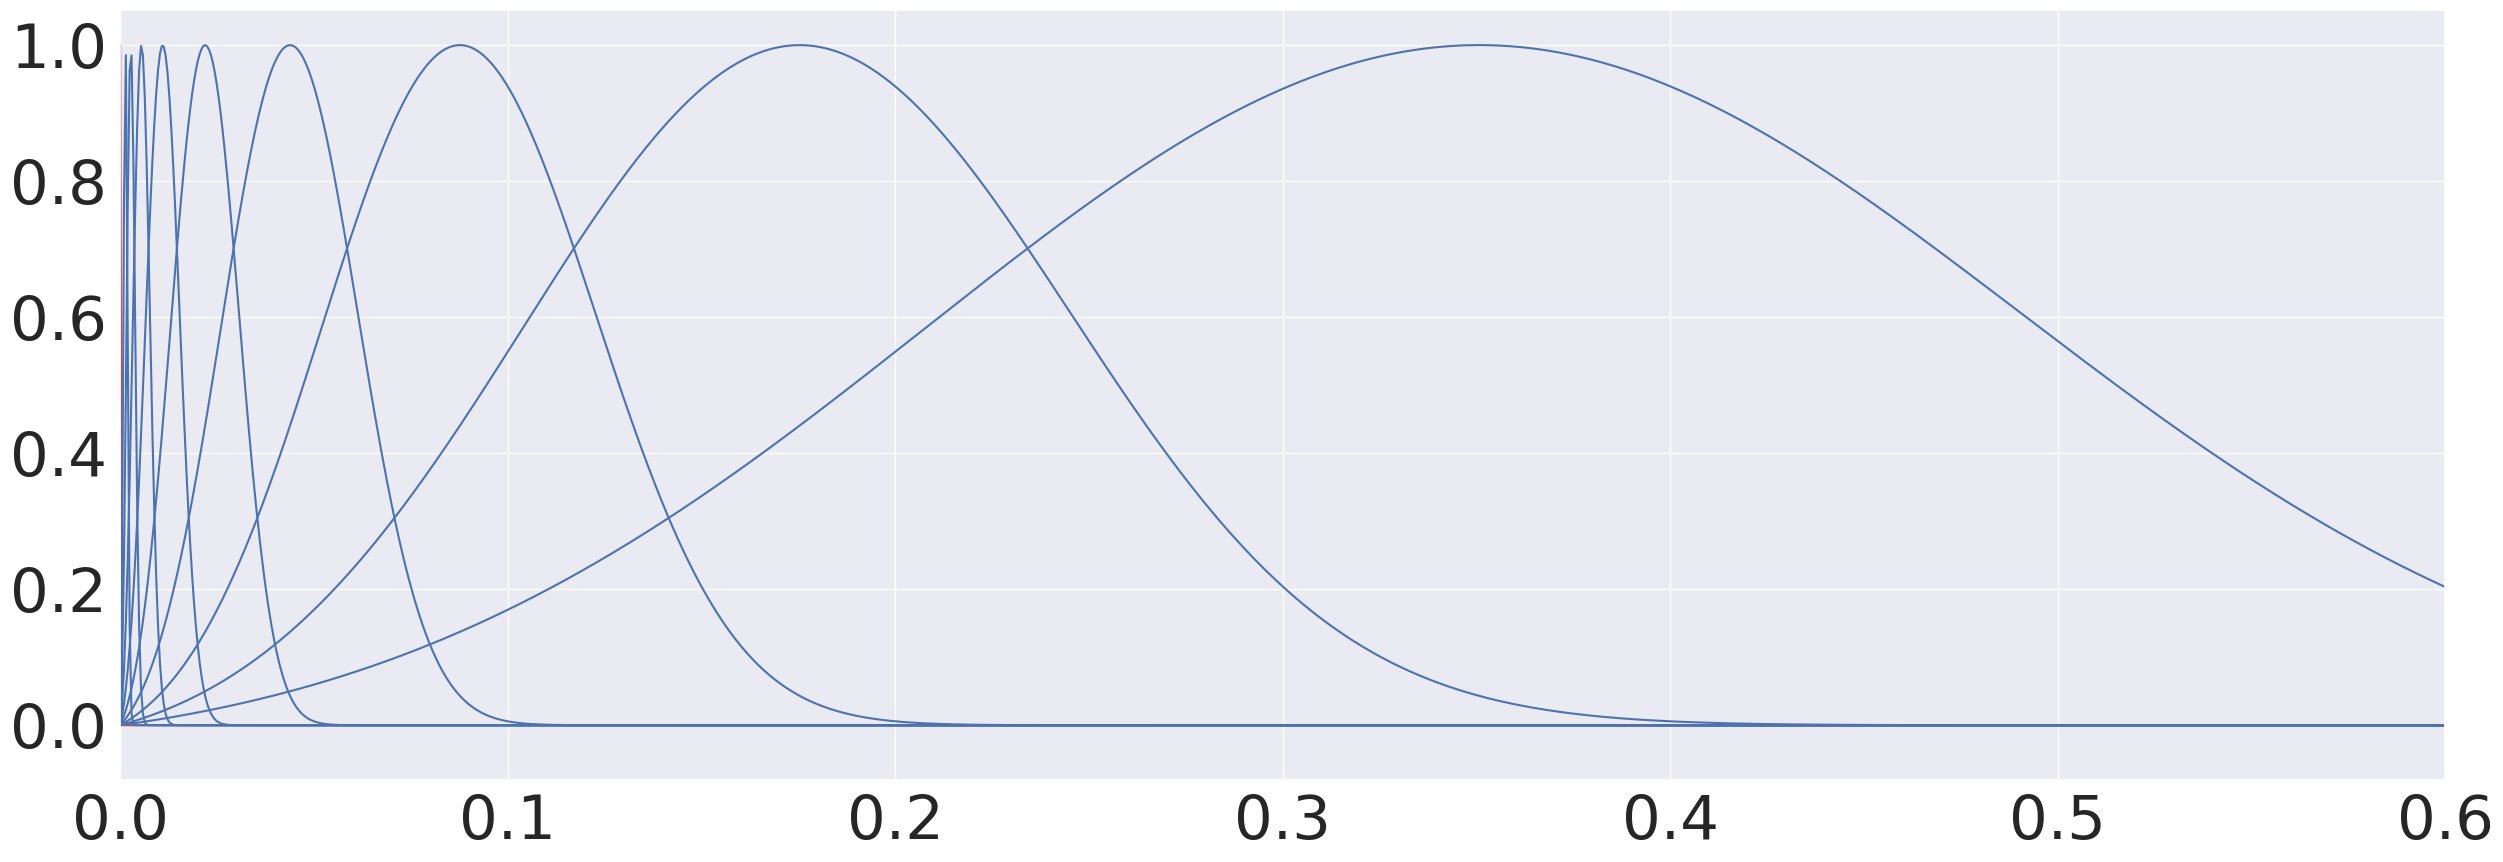

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from kymatio.scattering1d.filter_bank import scattering_filter_factory

T = 2048
J = 8
Q = (1, 1)

# Generate filter bank
phi_f, psi1_f, psi2_f = scattering_filter_factory(T, J, Q, T)
plt.plot(np.arange(T)/T, phi_f['levels'][0], 'r')
for psi_f in psi1_f:
    plt.plot(np.arange(T)/T, psi_f['levels'][0], 'b')
# Plot low-pass filter φ
#plt.figure(figsize=(10, 5))
#plt.plot(np.linspace(0, 1, len(phi_f['levels'])), phi_f['levels'], 'r', label=r'$\hat{\phi}(\omega)$')

# Plot first-order wavelets ψ₁
#for psi in psi1_f:
 #   plt.plot(np.linspace(0, 1, len(psi['levels'])), psi['levels'], 'b', alpha=0.5)

plt.xlim(0, 0.6)
#plt.xlabel(r'Normalized frequency $\omega$', fontsize=14)
#plt.ylabel(r'Filter amplitude', fontsize=14)
#plt.title(f'First-order filters (Q = {Q})', fontsize=16)
#plt.legend()
#plt.grid(True)
#plt.tight_layout()
#plt.show()



In [ ]:
plt.figure()
plt.plot(np.arange(T)/T, phi_f[0], 'r')
for psi_f in psi2_f:
    plt.plot(np.arange(T)/T, psi_f[0], 'b')
plt.xlim(0, 0.6)
plt.ylim(0, 1.2)
plt.xlabel(r'$\omega$', fontsize=18)
plt.ylabel(r'$\hat\psi_j(\omega)$', fontsize=18)
plt.title('Second-order filters (Q = 1)', fontsize=18)

NameError: name 'phi_f' is not defined

<Figure size 3000x1000 with 0 Axes>

In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
svc = svm.SVC(C=0.1, kernel='rbf', gamma=0.01, probability = True)
scaler = StandardScaler()
X = Sx_all[0:165]
#X = features.values[:,1:][0:165]
y = df_filtered.loc[:,['Hypertension']].values[0:165]
print("Shape of input and output variables data", "X:" ,X.shape, "y:" ,y.shape)
# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
scaler.fit(X_train)
svc.fit(scaler.transform(X_train), y_train.ravel())
pred = svc.predict(scaler.transform(X_test))
prob1 = svc.predict_proba(scaler.transform(X_test))
print(svc.score(scaler.transform(X_train),y_train))
print(classification_report(y_test.ravel(), pred, digits=4)) # Print classification report

Shape of input and output variables data X: (165, 19) y: (165, 1)
0.5772357723577236
                 precision    recall  f1-score   support

         Normal     1.0000    0.1429    0.2500        21
Prehypertension     0.5385    1.0000    0.7000        21

       accuracy                         0.5714        42
      macro avg     0.7692    0.5714    0.4750        42
   weighted avg     0.7692    0.5714    0.4750        42



In [ ]:
X.shape

(165, 19)

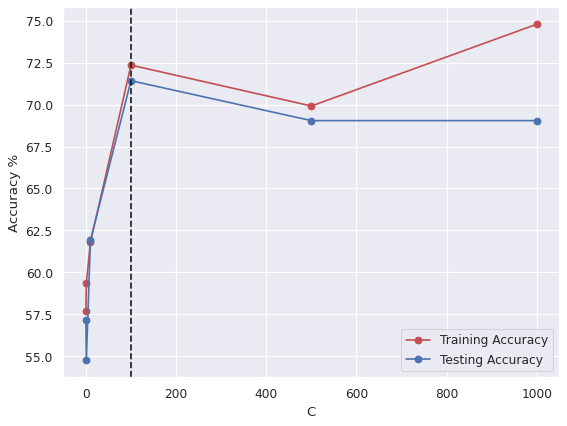

In [ ]:
c = [0.1, 1, 10, 100, 500,1000];
test_score = []
train_score = []
for i in range(0, len(c)):
  svc = svm.SVC(C=c[i], kernel='rbf', gamma=0.01, probability = True)
  scaler = StandardScaler()
  X = Sx_all[0:165]
  #X = features.values[:,1:][0:165]
  y = df_filtered.loc[:,['Hypertension']].values[0:165]
  # Split data in train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
  scaler.fit(X_train)
  svc.fit(scaler.transform(X_train), y_train.ravel())
  pred = svc.predict(scaler.transform(X_test))
  train_score.append(svc.score(scaler.transform(X_train),y_train)*100)
  test_score.append(svc.score(scaler.transform(X_test),y_test)*100)
figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("C")
plt.ylabel("Accuracy %")
plt.axvline(x=c[np.argmax(test_score)], color='k', linestyle='--', label='0.1')

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(C=10, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False).fit(scaler.transform(X_train), y_train.ravel())
pred_lr = clf_lr.predict(scaler.transform(X_test))
prob1_lr = clf_lr.predict_proba(scaler.transform(X_test))
print(clf_lr.score(scaler.transform(X_train),y_train))
print(classification_report(y_test.ravel(), pred_lr,digits=4)) # Print classification report

0.6585365853658537
                 precision    recall  f1-score   support

         Normal     0.6500    0.6190    0.6341        21
Prehypertension     0.6364    0.6667    0.6512        21

       accuracy                         0.6429        42
      macro avg     0.6432    0.6429    0.6427        42
   weighted avg     0.6432    0.6429    0.6427        42



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


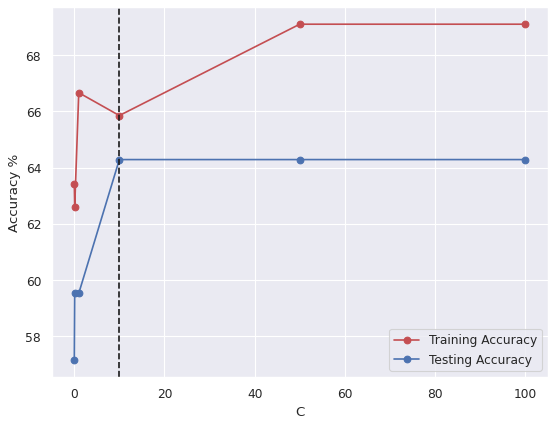

In [ ]:
c = [0.01,0.1, 1, 10, 50,100];
test_score = []
train_score = []
for i in range(0, len(c)):
  clf_lr = LogisticRegression(C=c[i], class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False).fit(scaler.transform(X_train), y_train.ravel())
  scaler = StandardScaler()
  X = Sx_all[0:165]
  #X = features.values[:,1:][0:165]
  y = df_filtered.loc[:,['Hypertension']].values[0:165]
  # Split data in train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
  scaler.fit(X_train)
  clf_lr.fit(scaler.transform(X_train), y_train.ravel())
  pred = clf_lr.predict(scaler.transform(X_test))
  train_score.append(clf_lr.score(scaler.transform(X_train),y_train)*100)
  test_score.append(clf_lr.score(scaler.transform(X_test),y_test)*100)
figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("C")
plt.ylabel("Accuracy %")
plt.axvline(x=c[np.argmax(test_score)], color='k', linestyle='--', label='100')

Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(scaler.transform(X_train), y_train)
pred_LDA = clf_LDA.predict(scaler.transform(X_test))
prob1_LDA = clf_LDA.predict_proba(scaler.transform(X_test))
print(clf_LDA.score(scaler.transform(X_train),y_train))
print(classification_report(y_test.ravel(), pred_LDA,digits=4)) # Print classification report

0.7073170731707317
                 precision    recall  f1-score   support

         Normal     0.5833    0.6667    0.6222        21
Prehypertension     0.6111    0.5238    0.5641        21

       accuracy                         0.5952        42
      macro avg     0.5972    0.5952    0.5932        42
   weighted avg     0.5972    0.5952    0.5932        42



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K-nearest Neieghtbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(scaler.transform(X_train), y_train.ravel())
pred_knn = neigh.predict(scaler.transform(X_test))
prob1_knn = neigh.predict_proba(scaler.transform(X_test))
print(neigh.score(scaler.transform(X_train),y_train))
print(classification_report(y_test.ravel(), pred_knn,digits=4)) # Print classification report

0.6585365853658537
                 precision    recall  f1-score   support

         Normal     0.6250    0.7143    0.6667        21
Prehypertension     0.6667    0.5714    0.6154        21

       accuracy                         0.6429        42
      macro avg     0.6458    0.6429    0.6410        42
   weighted avg     0.6458    0.6429    0.6410        42



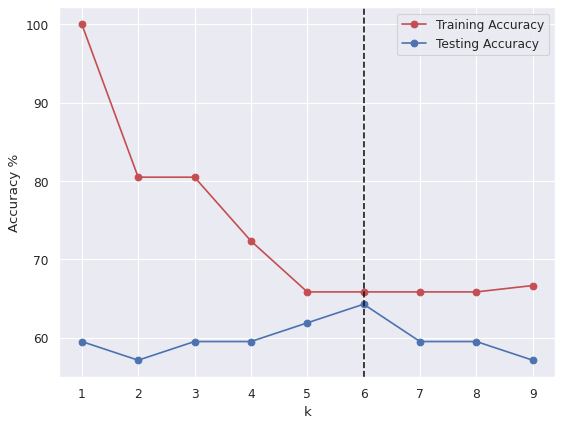

In [ ]:
c = [1,2, 3, 4,5,6,7,8,9];
test_score = []
train_score = []
for i in range(0, len(c)):
  neigh = KNeighborsClassifier(n_neighbors=c[i])
  scaler = StandardScaler()
  X = Sx_all[0:165]
  #X = features.values[:,1:][0:165]
  y = df_filtered.loc[:,['Hypertension']].values[0:165]
  # Split data in train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
  scaler.fit(X_train)
  neigh.fit(scaler.transform(X_train), y_train.ravel())
  pred = neigh.predict(scaler.transform(X_test))
  train_score.append(neigh.score(scaler.transform(X_train),y_train)*100)
  test_score.append(neigh.score(scaler.transform(X_test),y_test)*100)
figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("k")
plt.ylabel("Accuracy %")
plt.axvline(x=c[np.argmax(test_score)], color='k', linestyle='--', label='100')

Decision Tree

In [ ]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(criterion="gini", max_depth=6)
clf_dt.fit(X_train, y_train.ravel())
pred_dt = clf_dt.predict(X_test)
prob1_dt = clf_dt.predict_proba(X_test)
print(clf_dt.score(X_train,y_train))
print(classification_report(y_test.ravel(), pred_dt,digits=4)) # Print classification report

0.8292682926829268
                 precision    recall  f1-score   support

         Normal     0.5769    0.7143    0.6383        21
Prehypertension     0.6250    0.4762    0.5405        21

       accuracy                         0.5952        42
      macro avg     0.6010    0.5952    0.5894        42
   weighted avg     0.6010    0.5952    0.5894        42



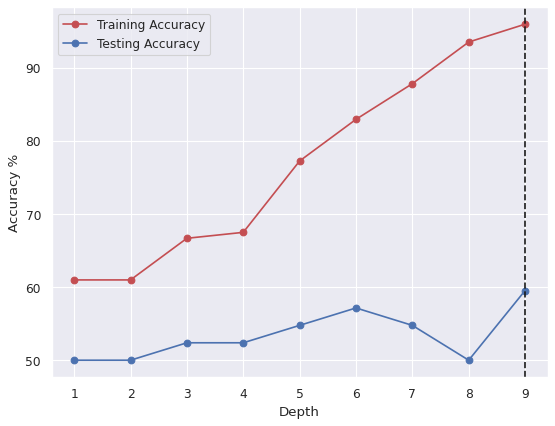

In [ ]:
c = [1,2, 3, 4,5,6,7,8,9];
test_score = []
train_score = []
for i in range(0, len(c)):
  clf_dt = tree.DecisionTreeClassifier(criterion="gini", max_depth=c[i])
  scaler = StandardScaler()
  X = Sx_all[0:165]
  #X = features.values[:,1:][0:165]
  y = df_filtered.loc[:,['Hypertension']].values[0:165]
  # Split data in train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
  scaler.fit(X_train)
  clf_dt.fit(scaler.transform(X_train), y_train.ravel())
  pred = clf_dt.predict(scaler.transform(X_test))
  train_score.append(clf_dt.score(scaler.transform(X_train),y_train)*100)
  test_score.append(clf_dt.score(scaler.transform(X_test),y_test)*100)
figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("Depth")
plt.ylabel("Accuracy %")
plt.axvline(x=c[np.argmax(test_score)], color='k', linestyle='--', label='100')

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
x2 = df_filtered[["Age(year)","BMI(kg/m^2)",'Weight(kg)']].values[0:165]
scaler2 = StandardScaler()
scaler2.fit(x2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x2, y, test_size=0.25,random_state=1) # 70% training and 30% test
svc2 = svm.SVC(C=100, kernel='rbf', gamma=0.000001,probability = True)
svc2.fit(X_train_2, y_train.ravel())
pred_2 = svc2.predict(X_test_2)
prob2 = svc2.predict_proba(X_test_2)
print(svc2.score(X_train_2,y_train))
print(classification_report(y_test.ravel(), pred_2)) # Print classification report

0.5934959349593496
                 precision    recall  f1-score   support

         Normal       0.75      0.57      0.65        21
Prehypertension       0.65      0.81      0.72        21

       accuracy                           0.69        42
      macro avg       0.70      0.69      0.69        42
   weighted avg       0.70      0.69      0.69        42



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
# Train the model using the training sets
knn.fit(X_train_2, y_train.ravel())
#Predict Output
pred_3 = knn.predict(X_test_2)
prob3 = knn.predict_proba(X_test_2)
print(knn.score(X_train_2,y_train))
print(classification_report(y_test.ravel(), pred_3)) # Print classification report

0.7479674796747967
                 precision    recall  f1-score   support

         Normal       0.48      0.48      0.48        21
Prehypertension       0.48      0.48      0.48        21

       accuracy                           0.48        42
      macro avg       0.48      0.48      0.48        42
   weighted avg       0.48      0.48      0.48        42



In [ ]:
lda_clf_2 = LinearDiscriminantAnalysis()
lda_clf_2.fit(X_train_2, y_train.ravel())
pred_4 = lda_clf_2.predict(X_test_2)
prob4 = lda_clf_2.predict_proba(X_test_2)
print(lda_clf_2.score(X_train_2,y_train))
print(classification_report(y_test.ravel(), pred_4)) # Print classification report

0.6504065040650406
                 precision    recall  f1-score   support

         Normal       0.62      0.62      0.62        21
Prehypertension       0.62      0.62      0.62        21

       accuracy                           0.62        42
      macro avg       0.62      0.62      0.62        42
   weighted avg       0.62      0.62      0.62        42



In [ ]:
dt_clf_2 = tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
dt_clf_2.fit(X_train_2, y_train.ravel())
pred_6 = dt_clf_2.predict(X_test_2)
prob6 = dt_clf_2.predict_proba(X_test_2)
print(dt_clf_2.score(X_train_2,y_train))
print(classification_report(y_test.ravel(), pred_6)) # Print classification report

0.7073170731707317
                 precision    recall  f1-score   support

         Normal       0.53      0.48      0.50        21
Prehypertension       0.52      0.57      0.55        21

       accuracy                           0.52        42
      macro avg       0.52      0.52      0.52        42
   weighted avg       0.52      0.52      0.52        42



In [ ]:
lr_clf_2 = LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False).fit(X_train, y_train.ravel())
lr_clf_2.fit(X_train_2, y_train.ravel())
pred_5 = lr_clf_2.predict(X_test_2)
prob5 = lr_clf_2.predict_proba(X_test_2)
print(lr_clf_2.score(X_train_2,y_train))
print(classification_report(y_test.ravel(), pred_5)) # Print classification report

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.6504065040650406
                 precision    recall  f1-score   support

         Normal       0.62      0.62      0.62        21
Prehypertension       0.62      0.62      0.62        21

       accuracy                           0.62        42
      macro avg       0.62      0.62      0.62        42
   weighted avg       0.62      0.62      0.62        42



In [ ]:
predicted_votes = [];
votes_normal = 0;
votes_pre = 0;
for i in range(0, len(pred)):
  if pred[[i]] == 'Normal':
    votes_normal = votes_normal  + 1
  if pred[[i]] == 'Prehypertension':
    votes_pre = votes_pre + 1
  if pred_2[[i]] == 'Normal':
    votes_normal = votes_normal  + 1
  if pred_2[[i]] == 'Prehypertension':
    votes_pre = votes_pre + 1
  if pred_3[[i]] == 'Normal':
    votes_normal = votes_normal  + 1
  if pred_3[[i]] == 'Prehypertension':
    votes_pre = votes_pre + 1
  if votes_normal > votes_pre:
    predicted_votes.append('Normal')
  if votes_normal < votes_pre:
    predicted_votes.append('Prehypertension')
  votes_normal = 0;
  votes_pre = 0;

In [ ]:
print(classification_report(y_test.ravel(), predicted_votes))

                 precision    recall  f1-score   support

         Normal       0.65      0.52      0.58        21
Prehypertension       0.60      0.71      0.65        21

       accuracy                           0.62        42
      macro avg       0.62      0.62      0.62        42
   weighted avg       0.62      0.62      0.62        42

